In [20]:
!python --version

Python 3.12.7


In [1]:
# import libraries

# importing os to access the file explorer to adjust the working directory
import os

#importing pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# importing matplotlib for plotting and visually represent data
import matplotlib.pyplot as plt
import seaborn as sns

#importing warnings to ignore the warnings in the result of each cell
import warnings
warnings.filterwarnings('ignore')

# Library to Keep this model into pkl file for future use
import joblib

# !pip install imblearn library - for handling imbalance data
from imblearn.over_sampling import RandomOverSampler

# importing libraries for decision tree classifier and other ensembling techniques
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier

#importing library for using ML pipleine and preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# imporing libraries for ML processing and metrics evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, f1_score #, make_scorer

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [2]:
# get the folder path - working directory
os.getcwd()

# change the folder to access the sample files - data set
os.chdir(r"C:\Users\raviksa\Documents\Inceptez 23\JanataHack-cross-sell-prediction\dataset")

In [3]:
ls

 Volume in drive C is OSDisk
 Volume Serial Number is A444-A0A3

 Directory of C:\Users\raviksa\Documents\Inceptez 23\JanataHack-cross-sell-prediction\dataset

11/29/2024  07:14 PM    <DIR>          .
11/29/2024  07:14 PM    <DIR>          ..
01/01/1980  12:00 AM         1,143,345 sample_submission_iA3afxn.csv
09/11/2020  09:57 AM         6,927,930 test.csv
09/11/2020  05:11 AM        21,432,357 train.csv
               3 File(s)     29,503,632 bytes
               2 Dir(s)  72,257,818,624 bytes free


In [4]:
# read the data

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv("sample_submission_iA3afxn.csv")

In [5]:
# change the folder to access the sample files - data set
os.chdir(r"C:\Users\raviksa\Documents\Inceptez 23\JanataHack-cross-sell-prediction")

#### Understanding of Data

In [6]:
# Total no. of rows and columns
train.shape, test.shape

((381109, 12), (127037, 11))

In [7]:
# get the datatypes
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [8]:
# get all the details of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [9]:
# to see the first few rows
train.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [10]:
#missing data
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

##### <span style="color:red"> Observation: We do not have any missing data in the training dataset </span>

In [11]:
#To check duplicates
train.duplicated().sum()

0

##### <span style="color:red"> Observation: No duplicate records observed </span>

#### Exploratory Data Analysis

In [12]:
train['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [13]:
train['Response'].value_counts(normalize = True) * 100

Response
0    87.743664
1    12.256336
Name: proportion, dtype: float64

##### <span style="color:red"> Observation: Imbalanced target data, huge disproportion with response for insurance vs no response for insurance </span>

<Axes: xlabel='Response'>

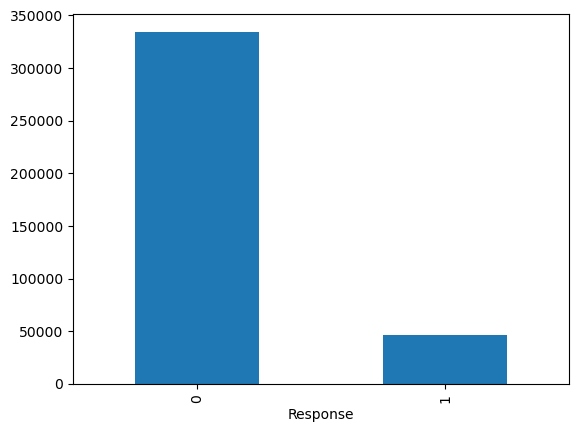

In [14]:
train.Response.value_counts().plot(kind = 'bar')

In [15]:
target_columns = ['Response']
ignore_columns = ['id']
categorical_columns = train.select_dtypes(include='object').columns
numerical_columns = train.select_dtypes(exclude='object').columns

In [16]:
print(target_columns,ignore_columns,categorical_columns,numerical_columns, sep='\n')

['Response']
['id']
Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')
Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


In [17]:
# display categorical columns
train[categorical_columns].head(2)

Gender Vehicle_Age Vehicle_Damage
0   Male   > 2 Years            Yes
1   Male    1-2 Year             No

In [18]:
# display numerical columns
train[numerical_columns].head(3)

id  Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   1   44                1         28.0                   0         40454.0   
1   2   76                1          3.0                   0         33536.0   
2   3   47                1         28.0                   0         38294.0   

   Policy_Sales_Channel  Vintage  Response  
0                  26.0      217         1  
1                  26.0      183         0  
2                  26.0       27         1

In [20]:
# remove target and employee id from the numerical columns list
numerical_columns = train.select_dtypes(exclude='object').drop(columns = ignore_columns + target_columns).columns

In [21]:
train[numerical_columns].head()

Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   44                1         28.0                   0         40454.0   
1   76                1          3.0                   0         33536.0   
2   47                1         28.0                   0         38294.0   
3   21                1         11.0                   1         28619.0   
4   29                1         41.0                   1         27496.0   

   Policy_Sales_Channel  Vintage  
0                  26.0      217  
1                  26.0      183  
2                  26.0       27  
3                 152.0      203  
4                 152.0       39

In [22]:
# describe takes only numeric columns by default. below query also excludes enrolle_id within all the numberic columns
train.drop(columns= ignore_columns).describe().T

count          mean           std     min      25%  \
Age                   381109.0     38.822584     15.511611    20.0     25.0   
Driving_License       381109.0      0.997869      0.046110     0.0      1.0   
Region_Code           381109.0     26.388807     13.229888     0.0     15.0   
Previously_Insured    381109.0      0.458210      0.498251     0.0      0.0   
Annual_Premium        381109.0  30564.389581  17213.155057  2630.0  24405.0   
Policy_Sales_Channel  381109.0    112.034295     54.203995     1.0     29.0   
Vintage               381109.0    154.347397     83.671304    10.0     82.0   
Response              381109.0      0.122563      0.327936     0.0      0.0   

                          50%      75%       max  
Age                      36.0     49.0      85.0  
Driving_License           1.0      1.0       1.0  
Region_Code              28.0     35.0      52.0  
Previously_Insured        0.0      1.0       1.0  
Annual_Premium        31669.0  39400.0  540165.0  
Policy_Sales_Channel    133.0    152.0     163.0  
Vintage                 154.0    227.0     299.0  
Response                  0.0      0.0       1.0

##### <span style="color:red"> Observation: Basic statistical data for numerical columns </span>

In [23]:
train.describe(include='object').T

count unique       top    freq
Gender          381109      2      Male  206089
Vehicle_Age     381109      3  1-2 Year  200316
Vehicle_Damage  381109      2       Yes  192413

##### <span style="color:red"> Observation: Basic data statistics, count and unique values for object type data columns </span>

In [24]:
train.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

##### <span style="color:red"> Observation: id is a unique value column, we can ignore this column for further preprocessing </span>

In [25]:
# results in the unique columns and unique values
for col in train.drop(columns=ignore_columns).columns:
    print(col, train[col].nunique(), '=>', train[col].unique())

Gender 2 => ['Male' 'Female']
Age 66 => [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
Driving_License 2 => [1 0]
Region_Code 53 => [28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]
Previously_Insured 2 => [0 1]
Vehicle_Age 3 => ['> 2 Years' '1-2 Year' '< 1 Year']
Vehicle_Damage 2 => ['Yes' 'No']
Annual_Premium 48838 => [ 40454.  33536.  38294. ...  20706. 101664.  69845.]
Policy_Sales_Channel 155 => [ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  

##### <span style="color:red"> Observation: explore columns and its values with value counts for understanding the data better in each column </span>

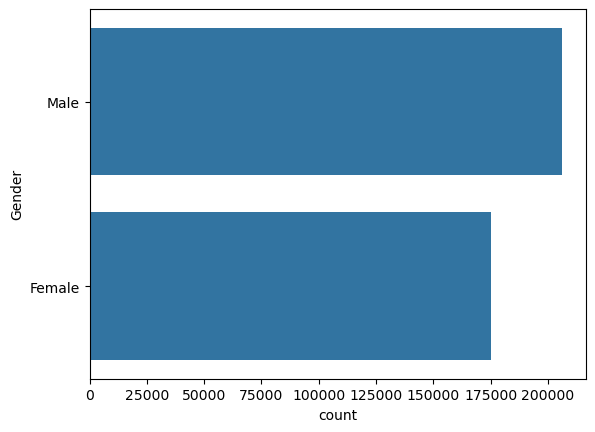

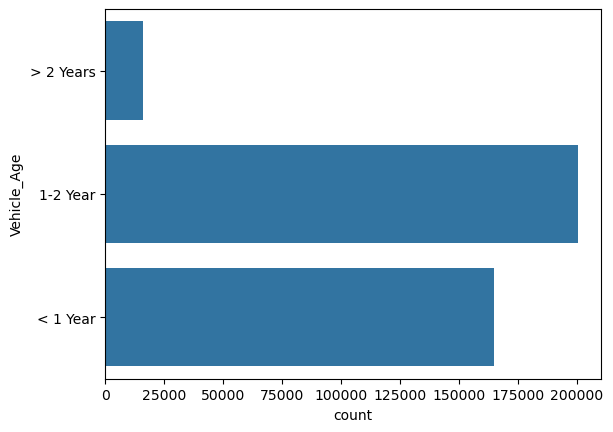

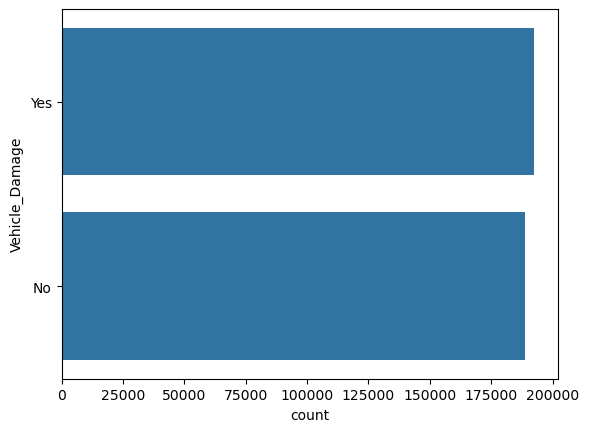

In [26]:
# printing the distribution of values in each columns to analyze the count of values in each column
for col in train.select_dtypes(include = 'object').columns:
    sns.countplot(y=train[col])
    plt.show()

##### <span style="color:red"> Observation: Observed vehicles with age greater than two years are not interested in the insurance </span>

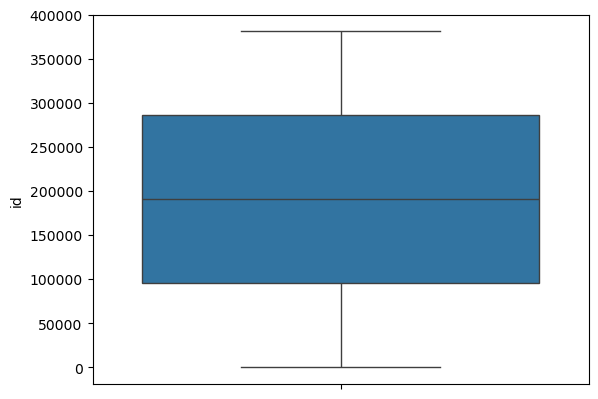

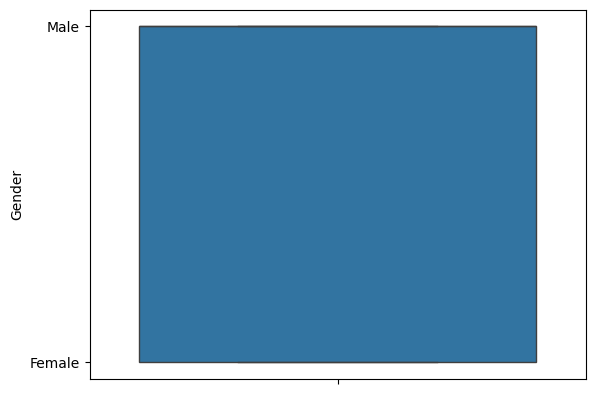

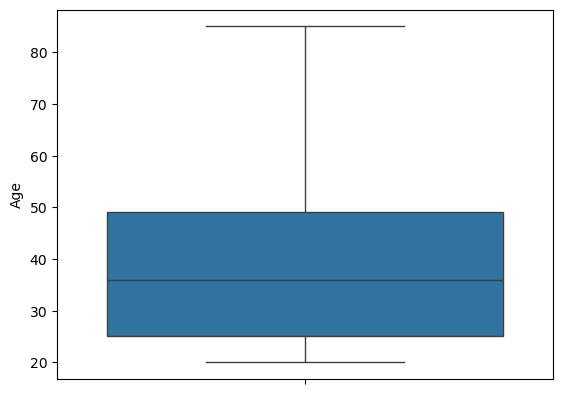

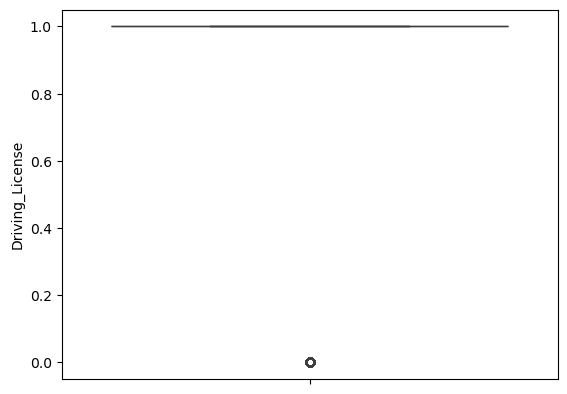

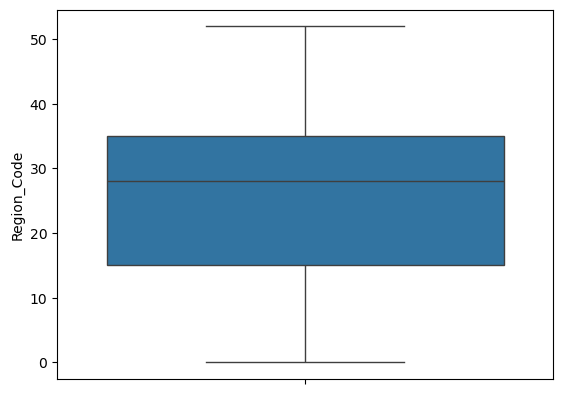

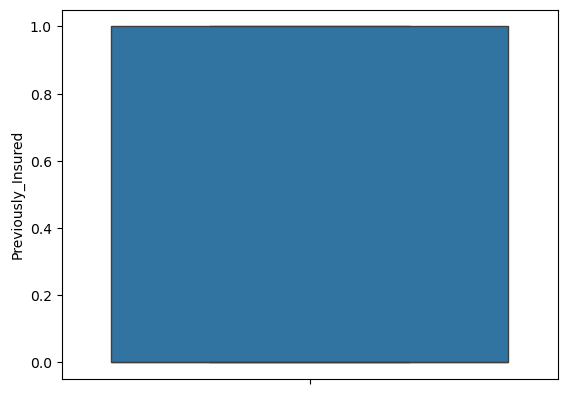

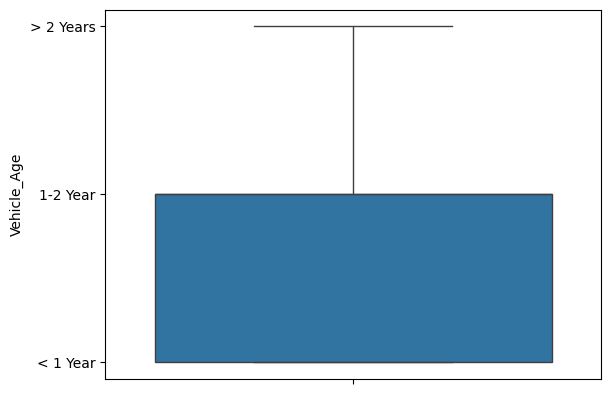

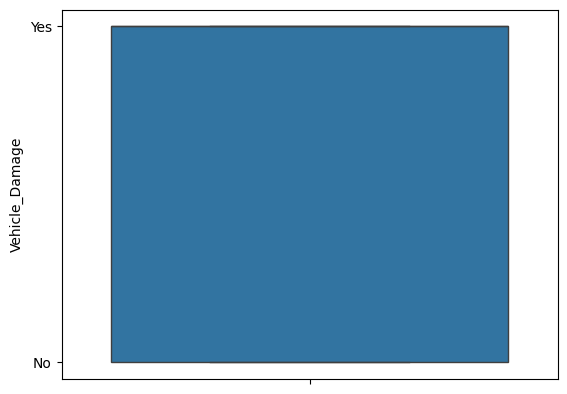

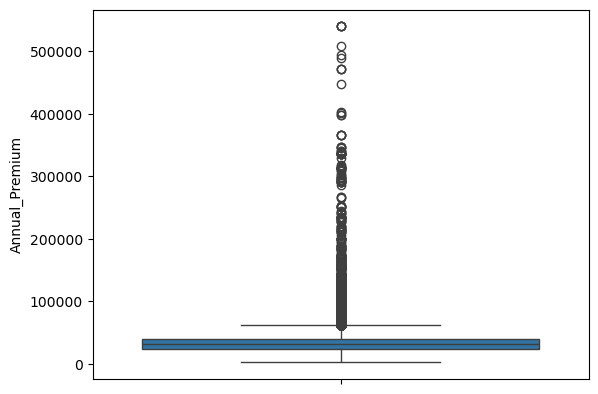

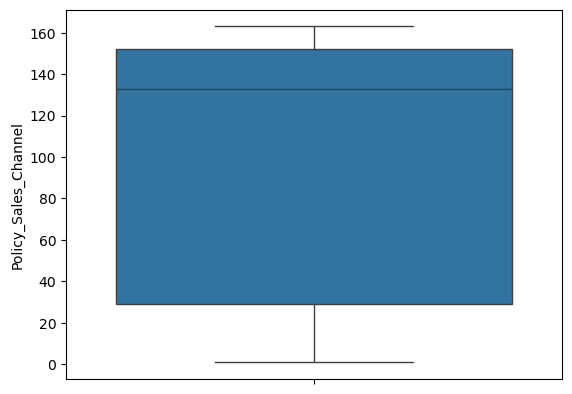

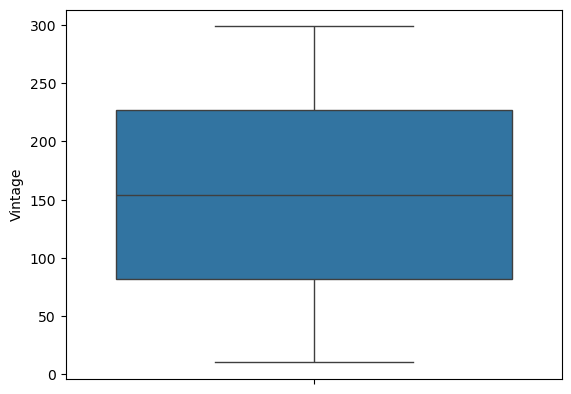

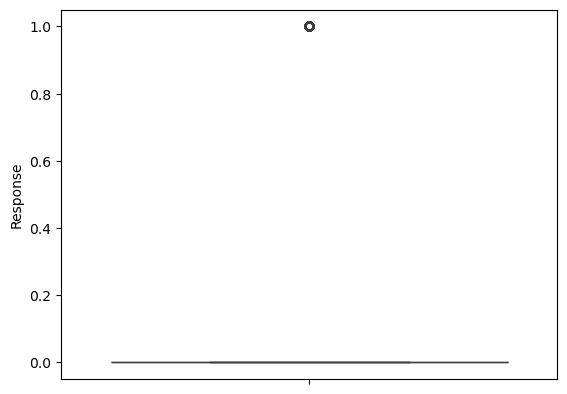

In [27]:
# printing the distribution of values in each columns to analyze the count of values in each column
for col in train.columns:
    sns.boxplot(y=train[col])
    plt.show()

##### <span style="color:red"> Observation: Annual premium has the most outliers </span>

<Axes: ylabel='Annual_Premium'>

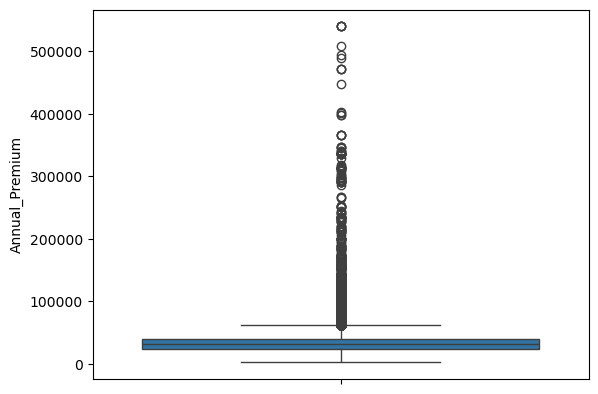

In [28]:
sns.boxplot(y=train['Annual_Premium'])

In [29]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = train['Annual_Premium'].quantile(0.25)
Q3 = train['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = train[(train['Annual_Premium'] < lower_bound) | (train['Annual_Premium'] > upper_bound)]
print("Outliers:")
print(outliers)

Outliers:
            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
25          26  Female   21                1         28.0                   1   
37          38  Female   25                1         28.0                   1   
67          68    Male   60                1         28.0                   0   
139        140    Male   21                1         29.0                   1   
149        150  Female   22                1         11.0                   1   
...        ...     ...  ...              ...          ...                 ...   
380959  380960    Male   25                1          8.0                   1   
380998  380999  Female   33                1          8.0                   0   
381035  381036  Female   22                1         11.0                   1   
381047  381048  Female   52                1          8.0                   1   
381079  381080    Male   33                1         28.0                   0   

       Vehicle_Ag

In [30]:
Outlier_values = pd.DataFrame(outliers)

In [31]:
Outlier_values.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
25    26  Female   21                1         28.0                   1   
37    38  Female   25                1         28.0                   1   
67    68    Male   60                1         28.0                   0   
139  140    Male   21                1         29.0                   1   
149  150  Female   22                1         11.0                   1   

    Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
25     < 1 Year             No         61964.0                 152.0       72   
37     < 1 Year             No         76251.0                 152.0      107   
67     1-2 Year            Yes         66338.0                 124.0       73   
139    < 1 Year             No         62164.0                 152.0      116   
149    < 1 Year             No         76651.0                 152.0      258   

     Response  
25          0  
37          0  
67          0  
139         0  
149         0

<Axes: xlabel='Response', ylabel='percent'>

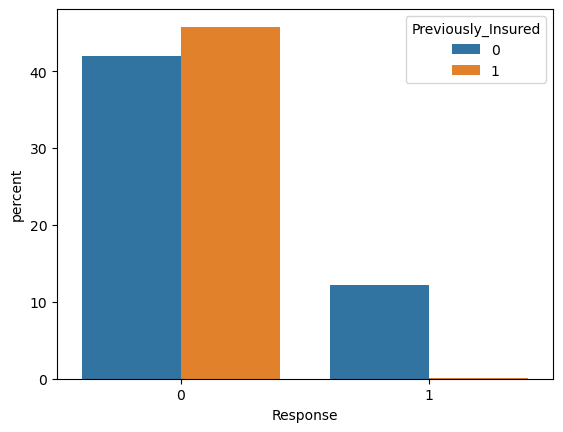

In [32]:
sns.countplot(train, x="Response", hue="Previously_Insured", stat="percent")

<Axes: xlabel='Previously_Insured', ylabel='percent'>

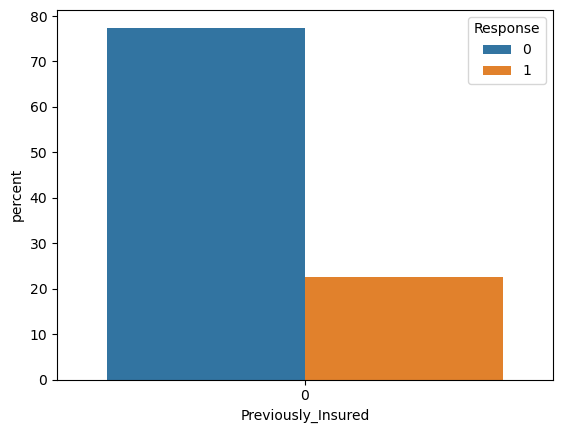

In [33]:
sns.countplot(x='Previously_Insured',hue='Response',data=train[train['Previously_Insured']==0], stat = 'percent')

##### <span style="color:red"> Observation: Around 22% of the people who are interested for an insurance doesn't have a vehicle insurance before </span>

<Axes: xlabel='Response', ylabel='percent'>

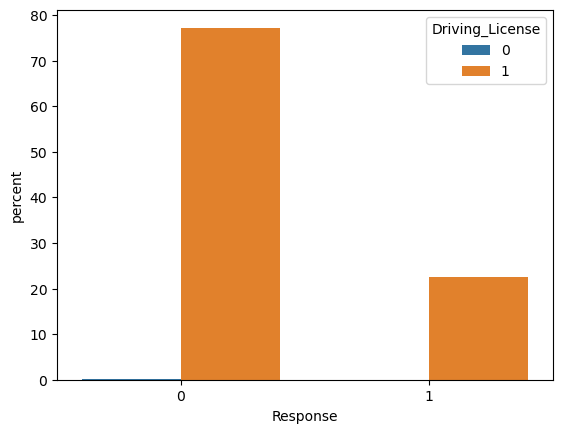

In [34]:
sns.countplot(x='Response',hue='Driving_License',data=train[train['Previously_Insured']==0], stat = 'percent')

<Axes: xlabel='Response', ylabel='percent'>

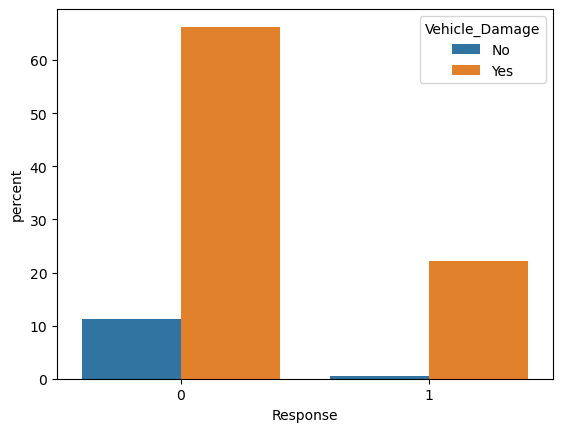

In [35]:
sns.countplot(x='Response',hue='Vehicle_Damage',data=train[train['Previously_Insured']==0], stat = 'percent')

<Axes: xlabel='Previously_Insured,Response'>

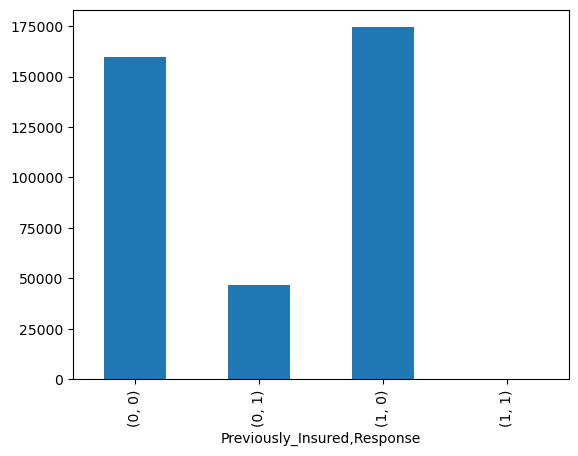

In [36]:
#sns.countplot(x='Response',hue='Vehicle_Age',data=train[train['Previously_Insured']==0], stat = 'percent')
train[['Previously_Insured','Response']].groupby('Previously_Insured').value_counts().plot(kind='bar')

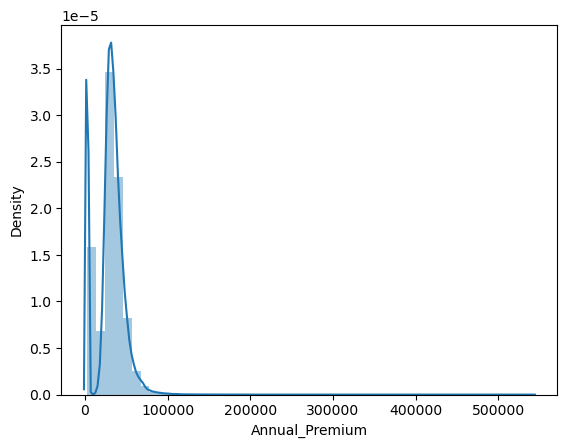

In [37]:
sns.distplot(train['Annual_Premium']);

<Axes: xlabel='Response', ylabel='count'>

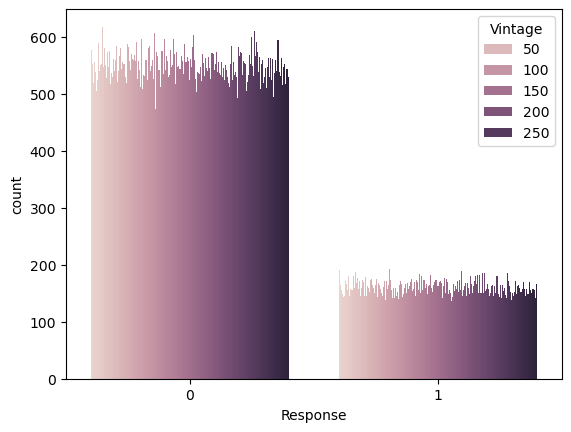

In [38]:
sns.countplot(x='Response',hue='Vintage',data=train[train['Previously_Insured']==0])

<Axes: xlabel='Vintage', ylabel='Annual_Premium'>

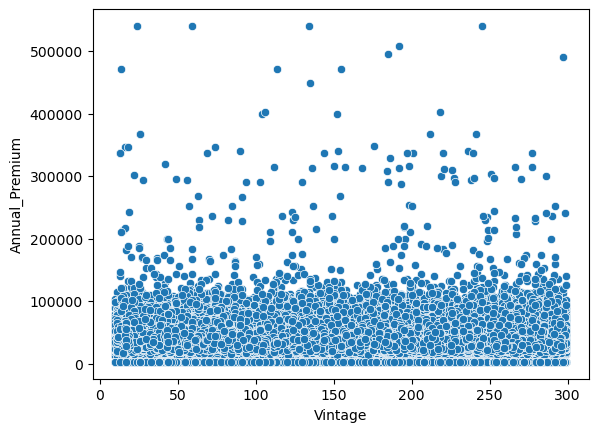

In [39]:
sns.scatterplot(data = train, x = 'Vintage' , y = 'Annual_Premium')

<Axes: xlabel='Vintage', ylabel='Annual_Premium'>

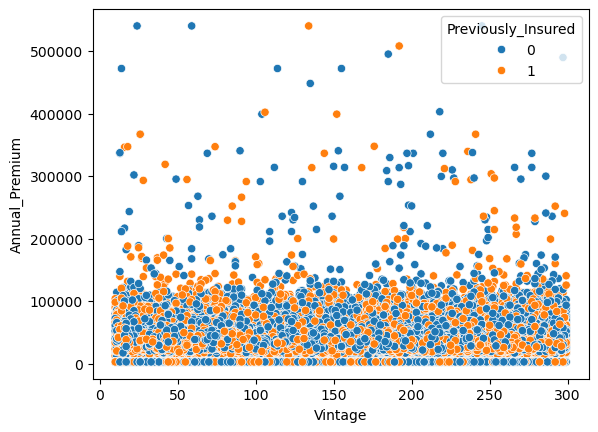

In [40]:
sns.scatterplot(data = train, x = 'Vintage' , y = 'Annual_Premium', hue = 'Previously_Insured')

<Axes: xlabel='Policy_Sales_Channel', ylabel='Annual_Premium'>

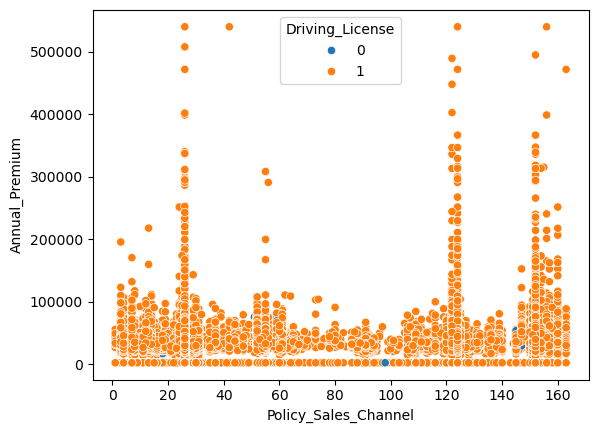

In [41]:
sns.scatterplot(data = train, x = 'Policy_Sales_Channel' , y = 'Annual_Premium', hue = 'Driving_License')

<Axes: xlabel='Policy_Sales_Channel', ylabel='Annual_Premium'>

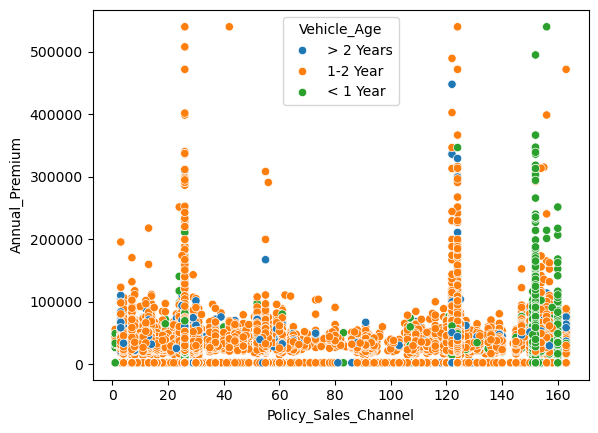

In [42]:
sns.scatterplot(data = train, x = 'Policy_Sales_Channel' , y = 'Annual_Premium', hue = 'Vehicle_Age')

<Axes: xlabel='Policy_Sales_Channel', ylabel='Annual_Premium'>

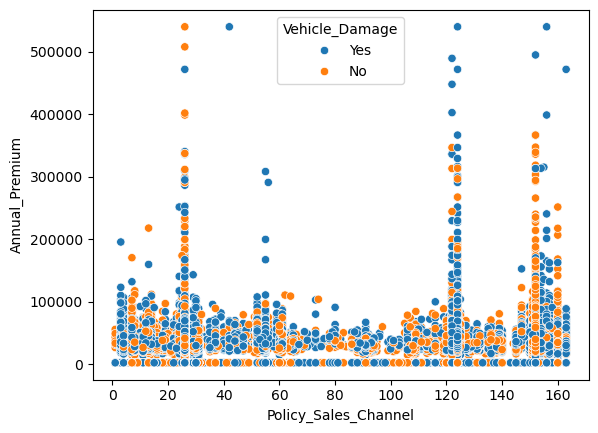

In [43]:
sns.scatterplot(data = train, x = 'Policy_Sales_Channel' , y = 'Annual_Premium', hue = 'Vehicle_Damage')

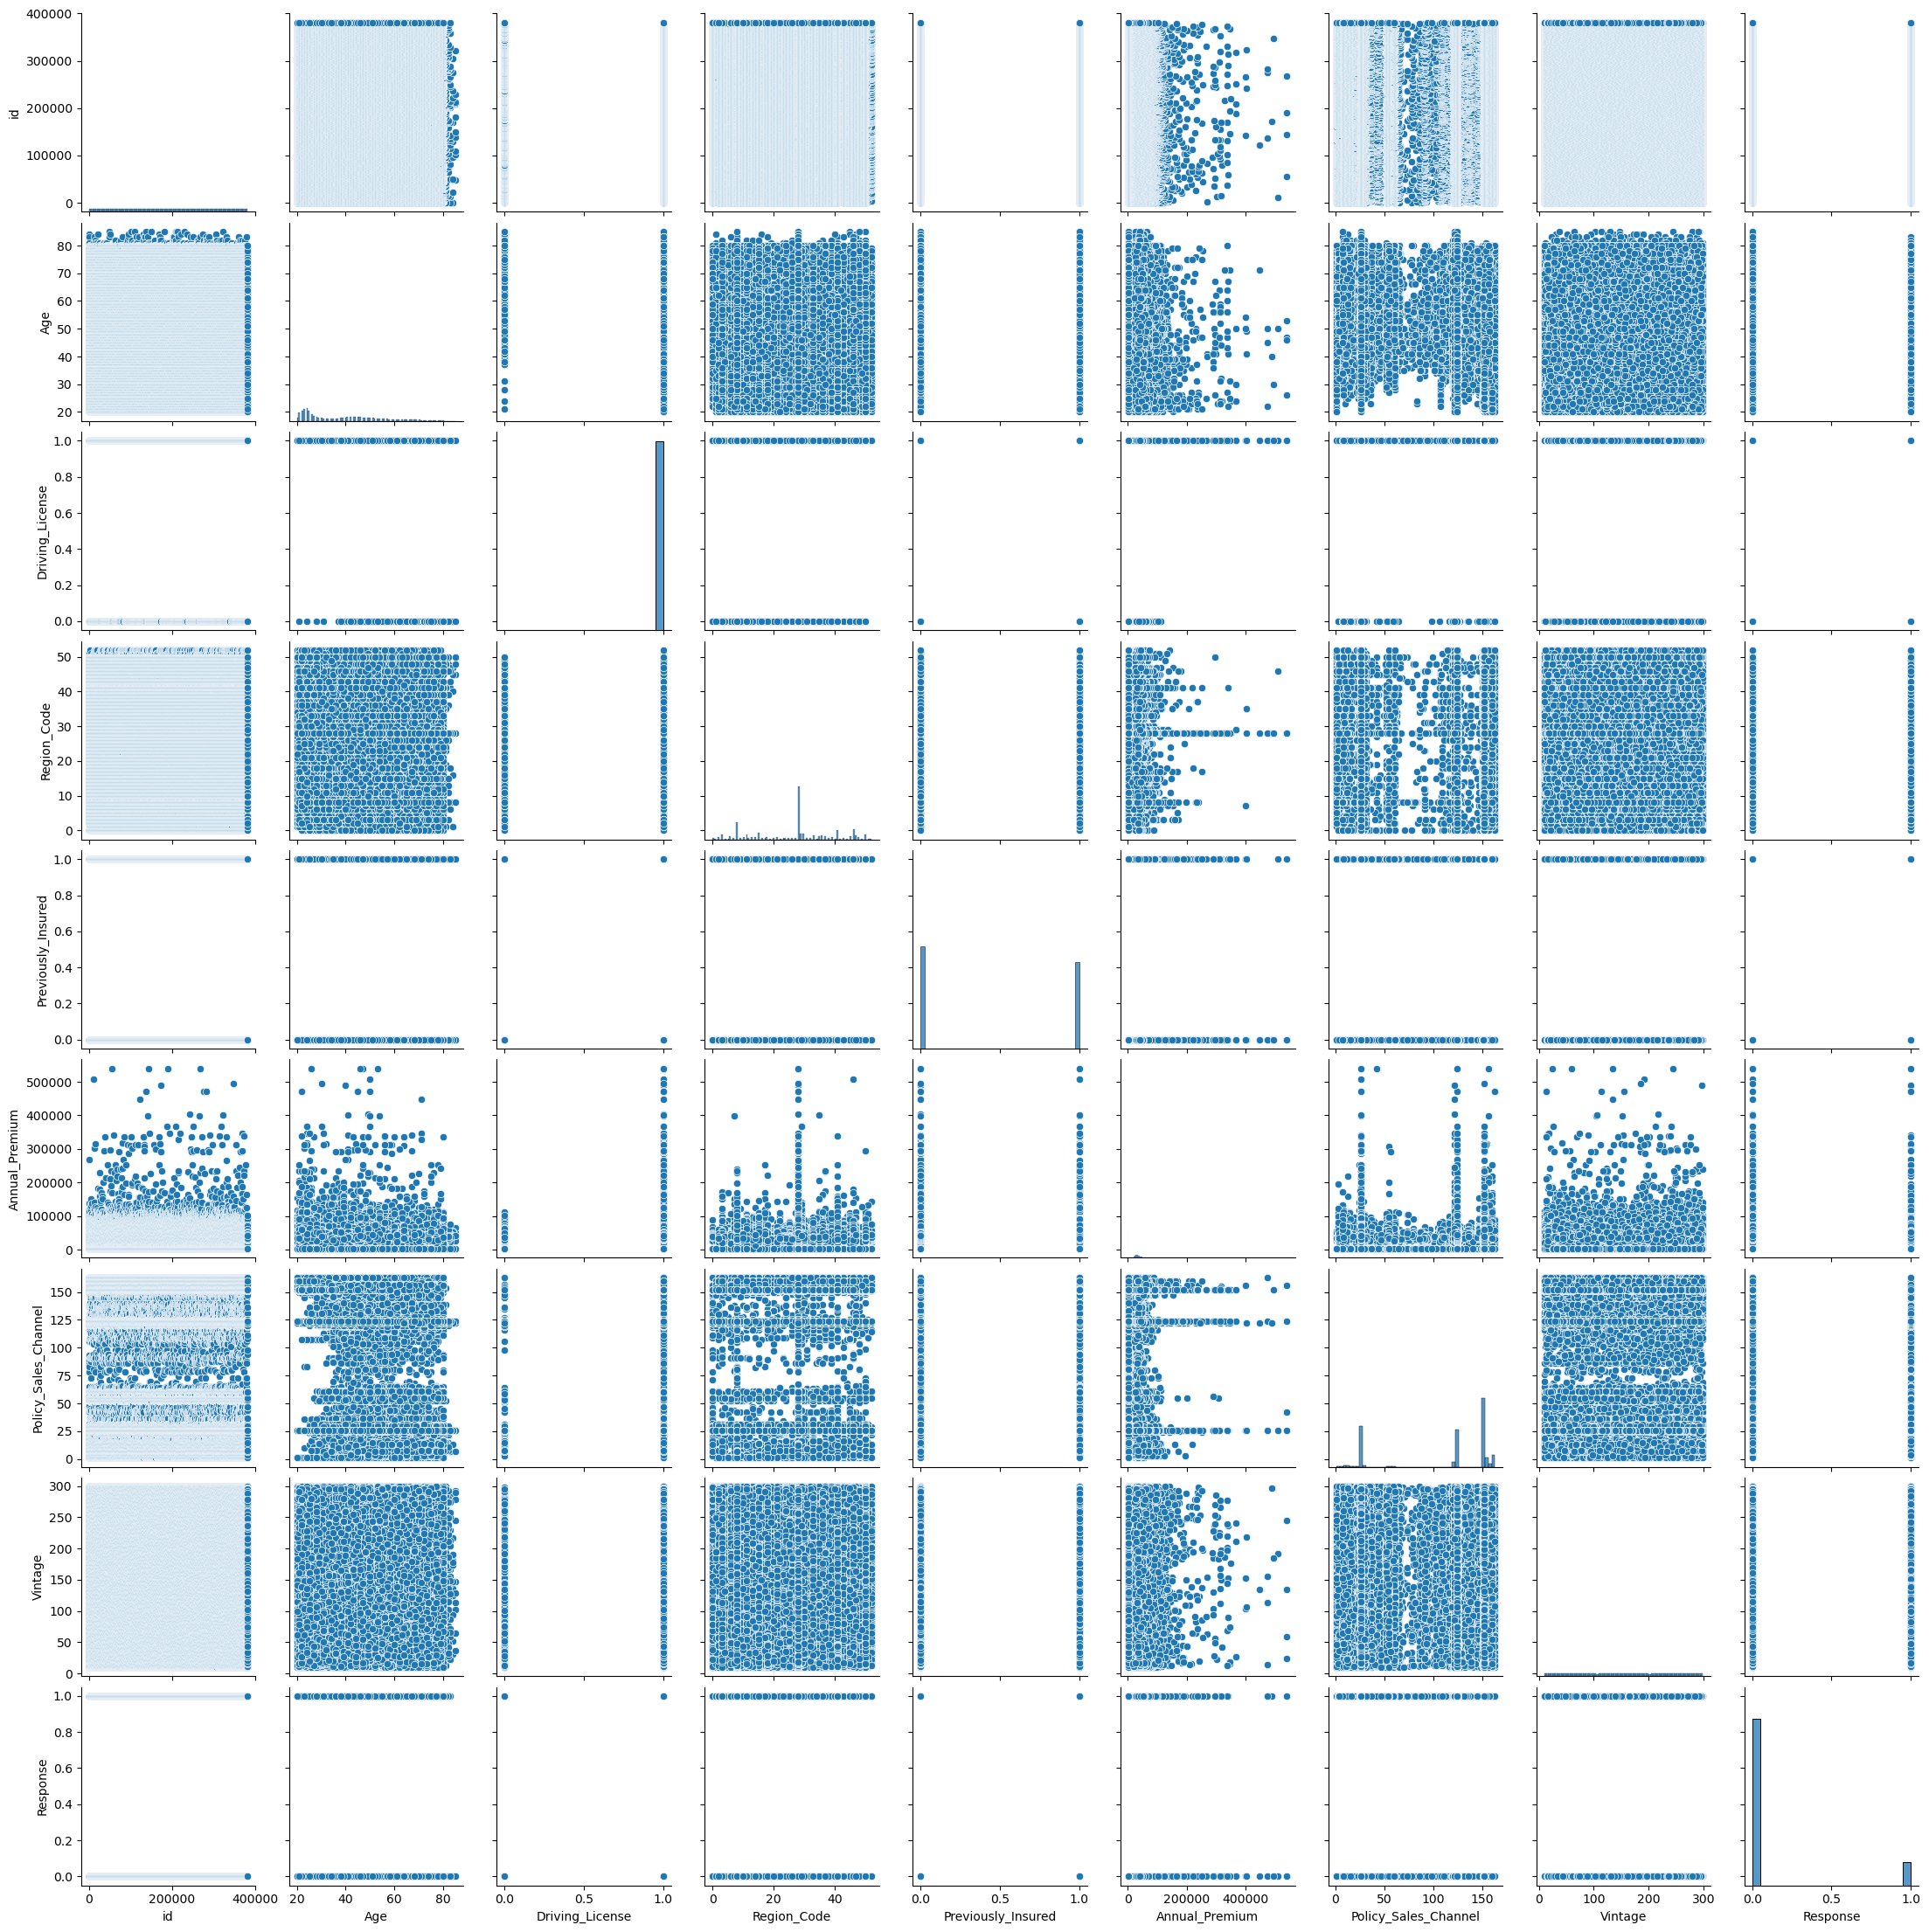

In [44]:
sns.pairplot(train)

In [45]:
train.drop(columns=ignore_columns).columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [46]:
# unstack method will convert the series output to a dataframe
previously_insured_response = train[['Previously_Insured','Response']].groupby('Previously_Insured').value_counts().unstack()

In [47]:
previously_insured_response

Response                 0      1
Previously_Insured               
0                   159929  46552
1                   174470    158

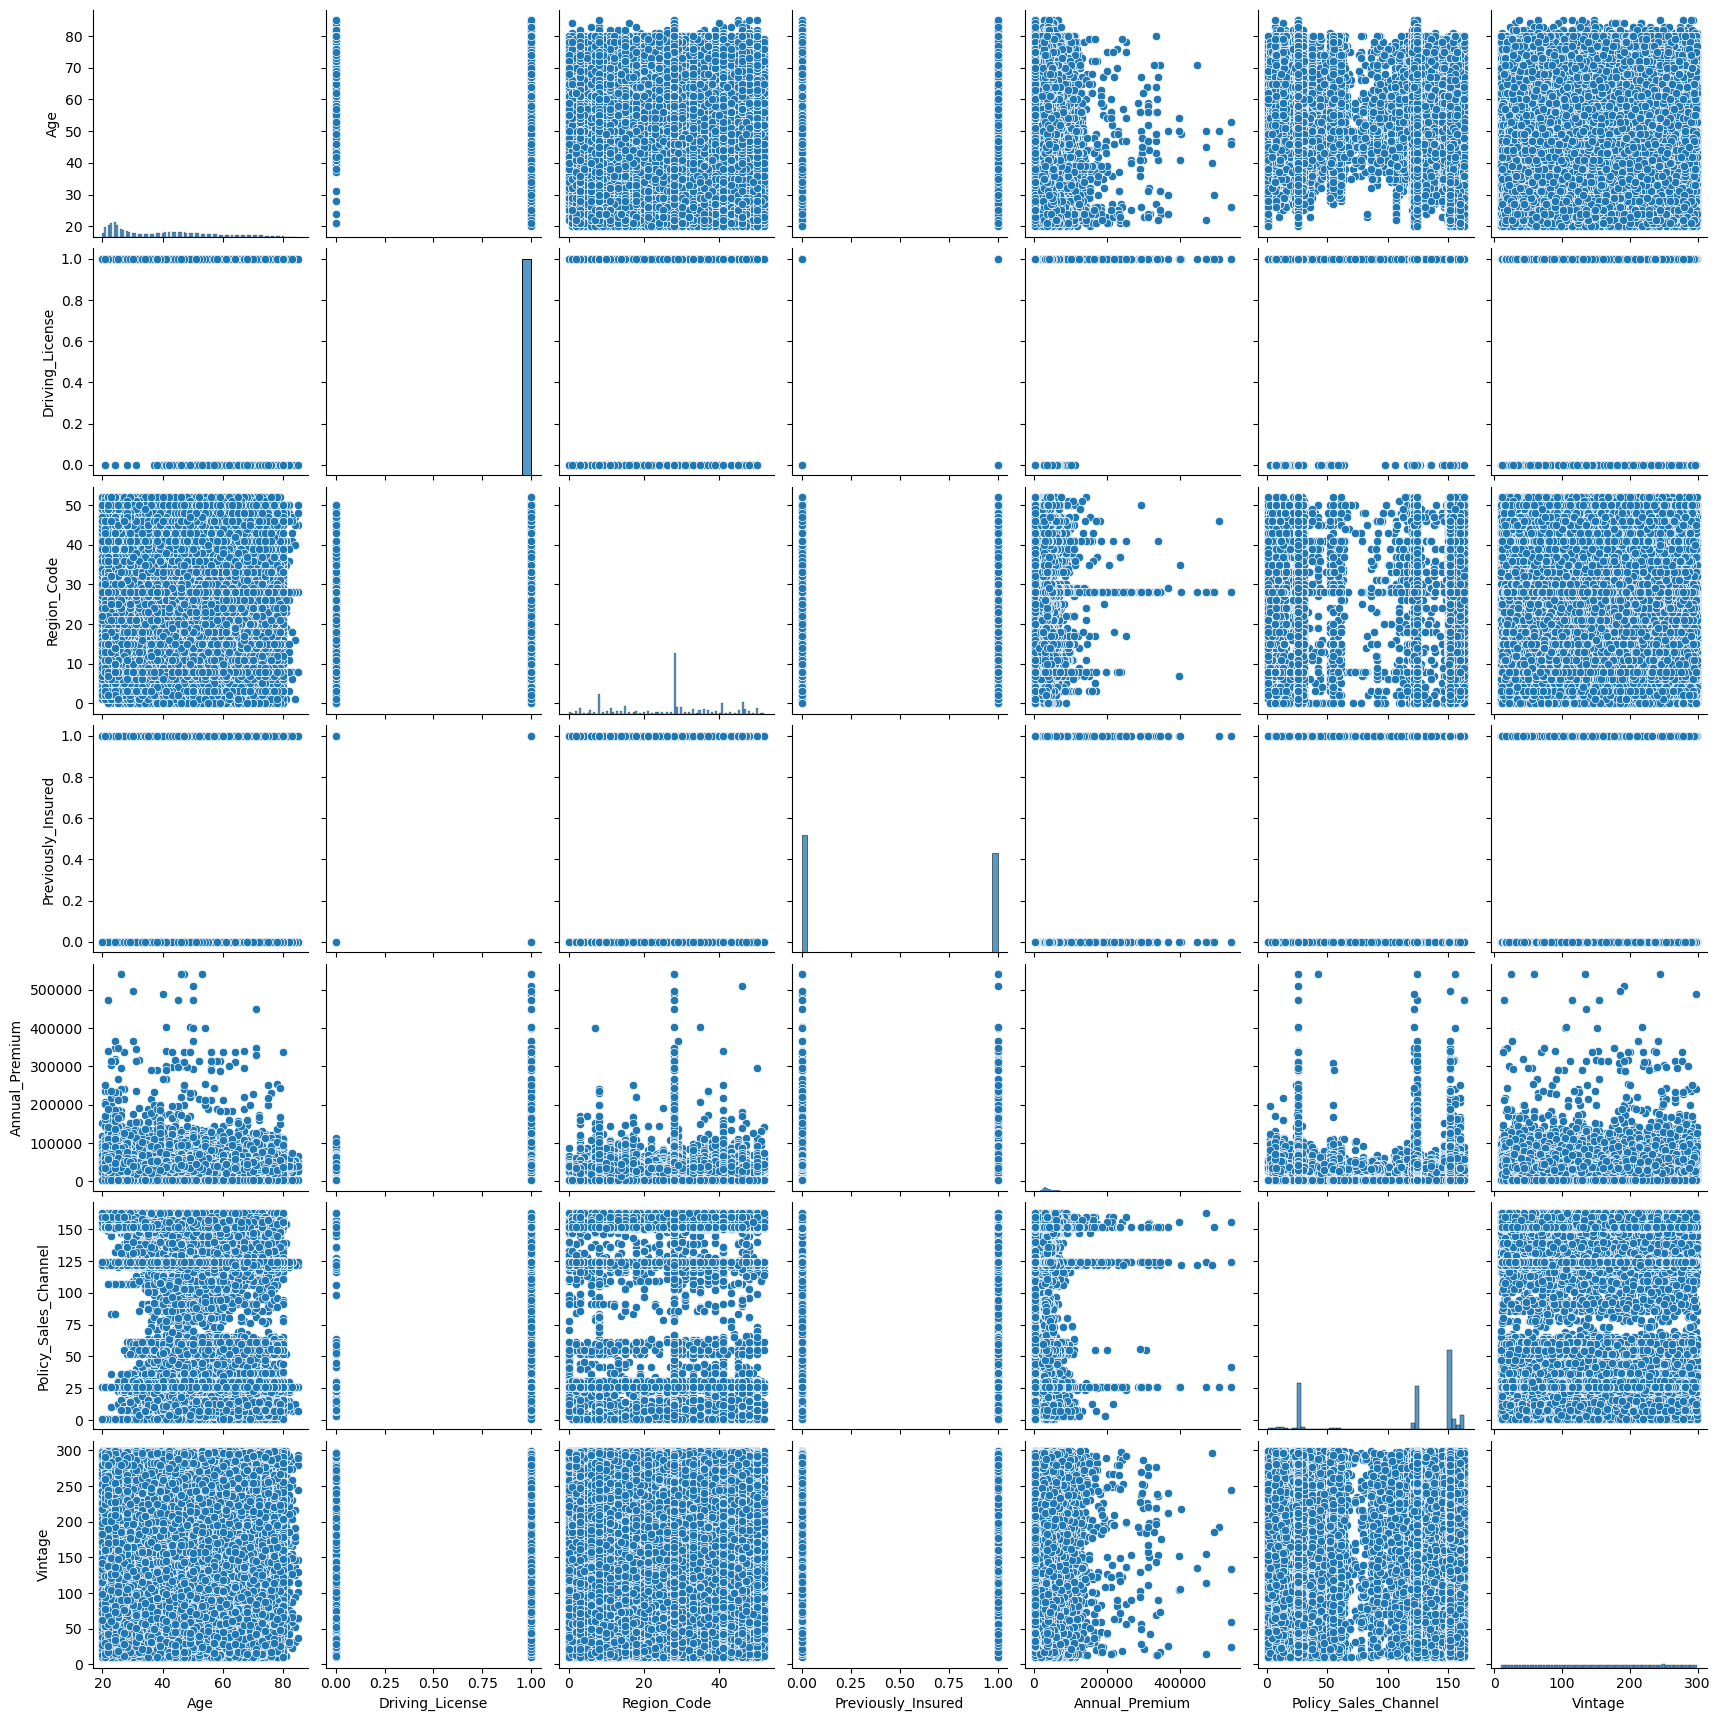

In [50]:
sns.pairplot(train[numerical_columns])

#### Model Pipeline

In [51]:
# defining a categorical pipeline for handling missing values and one hot encoding of categorical columns
categorical_pipeline_encode = Pipeline(
    steps = [
        ('impute_categorical', SimpleImputer(strategy='most_frequent')), #missing values
        ('ohe', OneHotEncoder(handle_unknown='ignore')) # categorical encoding
    ]
)

In [52]:
# defining a numerical pipeline for handling missing values and applying scaling for numerical columns
numerical_pipeline_encode = Pipeline(
    steps = [
        ('impute_numerical', SimpleImputer(strategy='median')), #missing values
        ('scale', StandardScaler()) # standard scaler 
        ]
)

In [53]:
# defining a preprocessing with both categorical and numerical pipelines
preprocessing = ColumnTransformer(
    transformers = [
        ('categorical_pipeline_encode', categorical_pipeline_encode, categorical_columns), #categorical columns
        ('numerical_pipeline_encode', numerical_pipeline_encode, numerical_columns) #numerical columns
    ]
)

In [54]:
my_model = LogisticRegression()

In [55]:
# defining a model pipeline to execute preprocessing and apply a logistic regression model
model_pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocessing), #preprocessing
        ('model', my_model) #model
    ]
)

In [56]:
# Populate X for training the appropriate columns data
X= train.drop(columns = ignore_columns+ target_columns)

In [57]:
X.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0    Male   44                1         28.0                   0   > 2 Years   
1    Male   76                1          3.0                   0    1-2 Year   
2    Male   47                1         28.0                   0   > 2 Years   
3    Male   21                1         11.0                   1    < 1 Year   
4  Female   29                1         41.0                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0            Yes         40454.0                  26.0      217  
1             No         33536.0                  26.0      183  
2            Yes         38294.0                  26.0       27  
3             No         28619.0                 152.0      203  
4             No         27496.0                 152.0       39

In [58]:
# populating y which is the target
y = train[target_columns]

In [59]:
y.head()

Response
0         1
1         0
2         1
3         0
4         0

In [60]:
# split into training and testing sets
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.1, random_state = 42)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((342998, 10), (38111, 10), (342998, 1), (38111, 1))

In [61]:
model_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical_pipeline_encode',
                                                  Pipeline(steps=[('impute_categorical',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('numerical_pipeline_encode',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [62]:
#fit the pipeline
model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical_pipeline_encode',
                                                  Pipeline(steps=[('impute_categorical',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('numerical_pipeline_encode',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [63]:
predicted_train_target = model_pipeline.predict(train_X)
predicted_val_target = model_pipeline.predict(val_X)

In [64]:
# percentage probability of 0 (not interested for Vehicle insurance) and 1 (interested for insurance)
model_pipeline.predict_proba(val_X)

array([[9.99560198e-01, 4.39801846e-04],
       [7.20521550e-01, 2.79478450e-01],
       [6.87021023e-01, 3.12978977e-01],
       ...,
       [8.42339826e-01, 1.57660174e-01],
       [8.07951356e-01, 1.92048644e-01],
       [6.86851592e-01, 3.13148408e-01]])

In [65]:
model_pipeline.predict(train_X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
# percentage probability of 0 (not interested for insurance)
model_pipeline.predict_proba(val_X)[:,0]

array([0.9995602 , 0.72052155, 0.68702102, ..., 0.84233983, 0.80795136,
       0.68685159])

In [67]:
# percentage probability of 1 (interested for insurance)
model_pipeline.predict_proba(val_X)[:,1]

array([0.0004398 , 0.27947845, 0.31297898, ..., 0.15766017, 0.19204864,
       0.31314841])

In [68]:
def model_train_val_evaluation(train_X, val_X, train_y, val_y, model_pipeline):
    predicted_train_target = model_pipeline.predict(train_X)
    predicted_val_target = model_pipeline.predict(val_X)

    print('Train auc score', roc_auc_score(train_y,predicted_train_target),sep='\n')
    print('Valid auc score', roc_auc_score(val_y,predicted_val_target),sep='\n')
    
    print('Train confusion_matrix', confusion_matrix(train_y,predicted_train_target),sep='\n')
    print('Valid confusion_matrix', confusion_matrix(val_y,predicted_val_target),sep='\n')

    print('Train classification_report', classification_report(train_y,predicted_train_target),sep='\n')
    print('Valid classification_report', classification_report(val_y,predicted_val_target),sep='\n')

    print('Evaluate model pipeline using predict_proba')
    y_predict_proba = model_pipeline.predict_proba(val_X)[:,1] # predicting only the True ones for the value = 1
    plt.figure()
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(val_y, y_predict_proba)
    #roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.plot(false_positive_rate, true_positive_rate)
    plt.show()

Train auc score
0.5000668710484634
Valid auc score
0.5
Train confusion_matrix
[[301061     10]
 [ 41920      7]]
Valid confusion_matrix
[[33328     0]
 [ 4783     0]]
Train classification_report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    301071
           1       0.41      0.00      0.00     41927

    accuracy                           0.88    342998
   macro avg       0.64      0.50      0.47    342998
weighted avg       0.82      0.88      0.82    342998

Valid classification_report
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     33328
           1       0.00      0.00      0.00      4783

    accuracy                           0.87     38111
   macro avg       0.44      0.50      0.47     38111
weighted avg       0.76      0.87      0.82     38111

Evaluate model pipeline using predict_proba


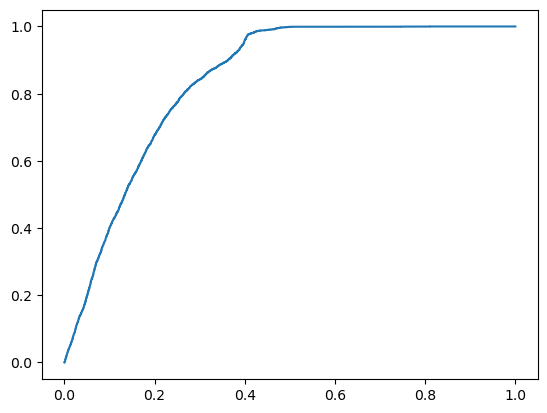

In [69]:
model_train_val_evaluation(train_X, val_X, train_y, val_y, model_pipeline)

In [70]:
params = [
    {
    'model': [LogisticRegression()],
    'model__penalty': ['l2', None],
    'model__C':[0.5,3]        
    }
]

In [71]:
grid = GridSearchCV(estimator = model_pipeline, param_grid=params, cv=2, scoring = 'roc_auc')

In [72]:
grid.fit(train_X, train_y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('categorical_pipeline_encode',
                                                                         Pipeline(steps=[('impute_categorical',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                                        ('numerical_pipeline_encode',
                                                                         Pipe...cal',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]}],
             scoring='roc_auc')

In [73]:
grid.best_params_

{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}

In [74]:
result = pd.DataFrame(grid.cv_results_)
result

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.356353      0.003022         0.125008        0.000008   
1       0.406381      0.002756         0.141648        0.001044   
2       0.379273      0.019891         0.135645        0.004994   
3       0.352364      0.008727         0.140079        0.000558   

            param_model  param_model__C param_model__penalty  \
0  LogisticRegression()             0.5                   l2   
1  LogisticRegression()             0.5                 None   
2  LogisticRegression()             3.0                   l2   
3  LogisticRegression()             3.0                 None   

                                              params  split0_test_score  \
0  {'model': LogisticRegression(), 'model__C': 0....           0.835956   
1  {'model': LogisticRegression(), 'model__C': 0....           0.835957   
2  {'model': LogisticRegression(), 'model__C': 3,...           0.835957   
3  {'model': LogisticRegression(), 'model__C': 3,...           0.835957   

   split1_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.836739         0.836347        0.000392                4  
1           0.836738         0.836348        0.000390                1  
2           0.836738         0.836348        0.000391                3  
3           0.836738         0.836348        0.000390                1

In [75]:
# Explore the grid cv results on how this the best
pd.set_option('display.max_colwidth', 100)
result[['params', 'mean_test_score','rank_test_score']]

params  \
0  {'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}   
1  {'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}   
2    {'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}   
3    {'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}   

   mean_test_score  rank_test_score  
0         0.836347                4  
1         0.836348                1  
2         0.836348                3  
3         0.836348                1

In [76]:
sub.head()

id  Response
0  381110         0
1  381111         0
2  381112         0
3  381113         0
4  381114         0

In [77]:
train.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [78]:
test.head()

id Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  381110   Male   25                1         11.0                   1   
1  381111   Male   40                1         28.0                   0   
2  381112   Male   47                1         28.0                   0   
3  381113   Male   24                1         27.0                   1   
4  381114   Male   27                1         28.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0    < 1 Year             No         35786.0                 152.0       53  
1    1-2 Year            Yes         33762.0                   7.0      111  
2    1-2 Year            Yes         40050.0                 124.0      199  
3    < 1 Year            Yes         37356.0                 152.0      187  
4    < 1 Year             No         59097.0                 152.0      297

In [79]:
# get the difference of columns in the two datasets train and test
train.columns.difference(test.columns)

Index(['Response'], dtype='object')

In [250]:
# updating the existing target values with the predicted values
sub['Response'] = model_pipeline.predict(test)

In [252]:
sub.to_csv('sub_1.csv', index=False)

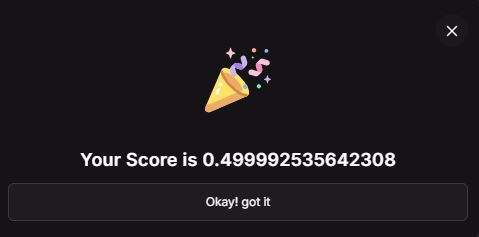

In [80]:
# Handling imbalance data

over_sampling = RandomOverSampler()

In [81]:
train_X_os, train_y_os = over_sampling.fit_resample(train_X, train_y)

In [82]:
train_y.value_counts()

Response
0           301071
1            41927
Name: count, dtype: int64

In [83]:
train_y_os.value_counts()

Response
0           301071
1           301071
Name: count, dtype: int64

In [84]:
params_2 = [
    {
        'model': [LogisticRegression()],
        'model__penalty': ['l2', None],
        'model__C':[0.5,3]        
    },
    {
        'model': [DecisionTreeClassifier()],
        'model__max_depth': [3,5]        
    }
]

In [85]:
grid_2 = GridSearchCV(estimator = model_pipeline, param_grid=params_2, cv=2, scoring = 'roc_auc')

In [86]:
grid_2.fit(train_X_os, train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('categorical_pipeline_encode',
                                                                         Pipeline(steps=[('impute_categorical',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                                        ('numerical_pipeline_encode',
                                                                         Pipe...
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [3, 5]}],
             scoring='roc_auc')

In [87]:
grid_2.best_params_

{'model': DecisionTreeClassifier(), 'model__max_depth': 5}

In [88]:
grid_2.cv_results_

{'mean_fit_time': array([0.62232351, 0.64052618, 0.6385355 , 0.68009293, 0.66335058,
        0.79742289]),
 'std_fit_time': array([0.00397611, 0.00482142, 0.01450467, 0.00821722, 0.00457072,
        0.00072217]),
 'mean_score_time': array([0.23438275, 0.22661495, 0.24679101, 0.24140179, 0.22269869,
        0.21094596]),
 'std_score_time': array([0.01563179, 0.00786066, 0.00318944, 0.01921856, 0.00394368,
        0.00780714]),
 'param_model': masked_array(data=[LogisticRegression(), LogisticRegression(),
                    LogisticRegression(), LogisticRegression(),
                    DecisionTreeClassifier(), DecisionTreeClassifier()],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_model__C': masked_array(data=[0.5, 0.5, 3.0, 3.0, --, --],
              mask=[False, False, False, False,  True,  True],
        fill_value=1e+20),
 'param_model__penalty': masked_array(data=['l2', None, 'l2', None, --, --],
     

In [89]:
new_model = grid_2.best_estimator_

In [90]:
grid_2.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical_pipeline_encode',
                                                  Pipeline(steps=[('impute_categorical',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('numerical_pipeline_encode',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier(max_depth=5))])

Train auc score
0.7912787270212388
Valid auc score
0.7955180512344238
Train confusion_matrix
[[202506  98565]
 [  3776  38151]]
Valid confusion_matrix
[[22541 10787]
 [  408  4375]]
Train classification_report
              precision    recall  f1-score   support

           0       0.98      0.67      0.80    301071
           1       0.28      0.91      0.43     41927

    accuracy                           0.70    342998
   macro avg       0.63      0.79      0.61    342998
weighted avg       0.90      0.70      0.75    342998

Valid classification_report
              precision    recall  f1-score   support

           0       0.98      0.68      0.80     33328
           1       0.29      0.91      0.44      4783

    accuracy                           0.71     38111
   macro avg       0.64      0.80      0.62     38111
weighted avg       0.90      0.71      0.76     38111

Evaluate model pipeline using predict_proba


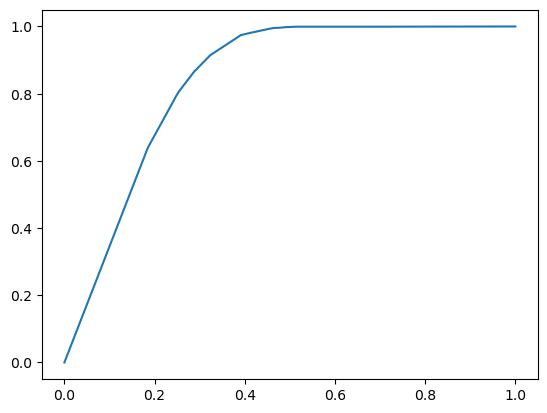

In [91]:
model_train_val_evaluation(train_X, val_X, train_y, val_y, new_model)

In [92]:
result2 = pd.DataFrame(grid_2.cv_results_)
result2

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.622324      0.003976         0.234383        0.015632   
1       0.640526      0.004821         0.226615        0.007861   
2       0.638535      0.014505         0.246791        0.003189   
3       0.680093      0.008217         0.241402        0.019219   
4       0.663351      0.004571         0.222699        0.003944   
5       0.797423      0.000722         0.210946        0.007807   

                param_model  param_model__C param_model__penalty  \
0      LogisticRegression()             0.5                   l2   
1      LogisticRegression()             0.5                 None   
2      LogisticRegression()             3.0                   l2   
3      LogisticRegression()             3.0                 None   
4  DecisionTreeClassifier()             NaN                  NaN   
5  DecisionTreeClassifier()             NaN                  NaN   

   param_model__max_depth  \
0                     NaN   
1                     NaN   
2                     NaN   
3                     NaN   
4                     3.0   
5                     5.0   

                                                                     params  \
0  {'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}   
1  {'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}   
2    {'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}   
3    {'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}   
4                {'model': DecisionTreeClassifier(), 'model__max_depth': 3}   
5                {'model': DecisionTreeClassifier(), 'model__max_depth': 5}   

   split0_test_score  split1_test_score  mean_test_score  std_test_score  \
0           0.836358           0.836416         0.836387        0.000029   
1           0.836358           0.836416         0.836387        0.000029   
2           0.836358           0.836416         0.836387        0.000029   
3           0.836358           0.836416         0.836387        0.000029   
4           0.817140           0.816691         0.816915        0.000224   
5           0.837613           0.837243         0.837428        0.000185   

   rank_test_score  
0                2  
1                4  
2                3  
3                4  
4                6  
5                1

In [93]:
# Explore the grid_2 cv results on how this the best
pd.set_option('display.max_colwidth', 100)
result2[['params', 'mean_test_score','rank_test_score']]

params  \
0  {'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}   
1  {'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}   
2    {'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}   
3    {'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}   
4                {'model': DecisionTreeClassifier(), 'model__max_depth': 3}   
5                {'model': DecisionTreeClassifier(), 'model__max_depth': 5}   

   mean_test_score  rank_test_score  
0         0.836387                2  
1         0.836387                4  
2         0.836387                3  
3         0.836387                4  
4         0.816915                6  
5         0.837428                1

In [94]:
# updating the existing target values with predicted values
sub['Response'] = new_model.predict(test)

In [284]:
sub.to_csv('sub_2.csv', index=False)

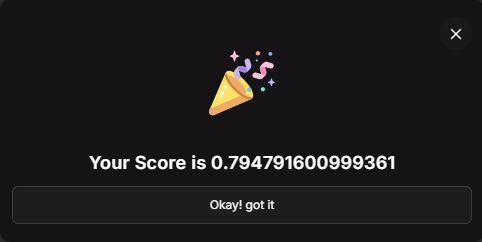

In [95]:
X_processed = pd.get_dummies(X, columns= categorical_columns , drop_first=True)

In [96]:
X_processed.head()

Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   44                1         28.0                   0         40454.0   
1   76                1          3.0                   0         33536.0   
2   47                1         28.0                   0         38294.0   
3   21                1         11.0                   1         28619.0   
4   29                1         41.0                   1         27496.0   

   Policy_Sales_Channel  Vintage  Gender_Male  Vehicle_Age_< 1 Year  \
0                  26.0      217         True                 False   
1                  26.0      183         True                 False   
2                  26.0       27         True                 False   
3                 152.0      203         True                  True   
4                 152.0       39        False                  True   

   Vehicle_Age_> 2 Years  Vehicle_Damage_Yes  
0                   True                True  
1                  False               False  
2                   True                True  
3                  False               False  
4                  False               False

In [97]:
X_processed.isna().sum()

Age                      0
Driving_License          0
Region_Code              0
Previously_Insured       0
Annual_Premium           0
Policy_Sales_Channel     0
Vintage                  0
Gender_Male              0
Vehicle_Age_< 1 Year     0
Vehicle_Age_> 2 Years    0
Vehicle_Damage_Yes       0
dtype: int64

In [98]:
train_X_processed, test_X_processed, train_y_processed, test_y_processed = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [99]:
train_X_processed.shape, test_X_processed.shape, train_y_processed.shape, test_y_processed.shape

((304887, 11), (76222, 11), (304887, 1), (76222, 1))

In [100]:
test_y_processed.columns.difference(train_y_processed.columns)

Index([], dtype='object')

In [101]:
train_X_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304887 entries, 332803 to 121958
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Age                    304887 non-null  int64  
 1   Driving_License        304887 non-null  int64  
 2   Region_Code            304887 non-null  float64
 3   Previously_Insured     304887 non-null  int64  
 4   Annual_Premium         304887 non-null  float64
 5   Policy_Sales_Channel   304887 non-null  float64
 6   Vintage                304887 non-null  int64  
 7   Gender_Male            304887 non-null  bool   
 8   Vehicle_Age_< 1 Year   304887 non-null  bool   
 9   Vehicle_Age_> 2 Years  304887 non-null  bool   
 10  Vehicle_Damage_Yes     304887 non-null  bool   
dtypes: bool(4), float64(3), int64(4)
memory usage: 19.8 MB


In [102]:
# Ensure all specified columns exist in the DataFrame
missing_cat_cols = [col for col in categorical_columns if col not in X.columns]
missing_num_cols = [col for col in numerical_columns if col not in X.columns]

if missing_cat_cols:
    print(f"Warning: The following categorical columns are missing from the DataFrame: {missing_cat_cols}")
if missing_num_cols:
    print(f"Warning: The following numerical columns are missing from the DataFrame: {missing_num_cols}")

In [103]:
# defining a categorical pipeline for handling missing values and one hot encoding of categorical columns
categorical_pipeline_encode1 = Pipeline(
    steps = [
        ('impute_categorical1', SimpleImputer(strategy='most_frequent')), #missing values
        ('ohe1', OneHotEncoder()) # categorical encoding
    ]
)

In [104]:
# defining a numerical pipeline for handling missing values and applying scaling for numerical columns
numerical_pipeline_encode1 = Pipeline(
    steps = [
        ('impute_numerical1', SimpleImputer(strategy='mean')), #missing values impute with mean
        ('scale1', StandardScaler()) # standard scaler 
        ]
)

In [105]:
# defining a preprocessing with only numerical pipelines
preprocessing1 = ColumnTransformer(
    transformers = [
        #('categorical_pipeline_encode1', categorical_pipeline_encode1, categorical_columns),
        ('numerical_pipeline_encode1', numerical_pipeline_encode1, numerical_columns)
    ]
)

In [111]:
# defining a model pipeline to execute preprocessing and apply a Random forest with SMOTE
model_pipeline_smote = Pipeline(
    steps=[
        ('smote', SMOTE(random_state=42)), #oversampling minority class
        ('preprocessing1', preprocessing1),
        ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ]
)

In [112]:
params_3 = {
    'model__n_estimators': [50, 100, 200],  # Number of trees
    'model__max_depth': [3, 5, 7, 10],    # Depth of each tree
    'model__min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'model__class_weight': [None, 'balanced'],  # Handle class imbalance
    'model__learning_rate': [0.01, 0.1]
}

In [113]:
grid_3 = GridSearchCV(estimator = model_pipeline_smote, param_grid=params_3, cv=3, scoring = 'roc_auc')

In [337]:
grid_3.fit(train_X_processed, train_y_processed)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('preprocessing1',
                                        ColumnTransformer(transformers=[('numerical_pipeline_encode1',
                                                                         Pipeline(steps=[('impute_numerical1',
                                                                                          SimpleImputer()),
                                                                                         ('scale1',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vi...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__learning_rate': [0.01, 0.1],
                         'model__max_depth': [3, 5, 7, 10],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [339]:
grid_3.best_params_

{'model__class_weight': None,
 'model__learning_rate': 0.1,
 'model__max_depth': 7,
 'model__min_samples_split': 2,
 'model__n_estimators': 200}

In [341]:
grid_3.best_estimator_

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('preprocessing1',
                 ColumnTransformer(transformers=[('numerical_pipeline_encode1',
                                                  Pipeline(steps=[('impute_numerical1',
                                                                   SimpleImputer()),
                                                                  ('scale1',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, min_samples_split=2,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=200,
                               n_jobs=None, ...))])

In [343]:
new_model_3 = grid_3.best_estimator_

Train auc score
0.7133643272134126
Valid auc score
0.7015042960385992
Train confusion_matrix
[[219589  48111]
 [ 14635  22552]]
Valid confusion_matrix
[[54490 12209]
 [ 3942  5581]]
Train classification_report
              precision    recall  f1-score   support

           0       0.94      0.82      0.87    267700
           1       0.32      0.61      0.42     37187

    accuracy                           0.79    304887
   macro avg       0.63      0.71      0.65    304887
weighted avg       0.86      0.79      0.82    304887

Valid classification_report
              precision    recall  f1-score   support

           0       0.93      0.82      0.87     66699
           1       0.31      0.59      0.41      9523

    accuracy                           0.79     76222
   macro avg       0.62      0.70      0.64     76222
weighted avg       0.86      0.79      0.81     76222

Evaluate model pipeline using predict_proba


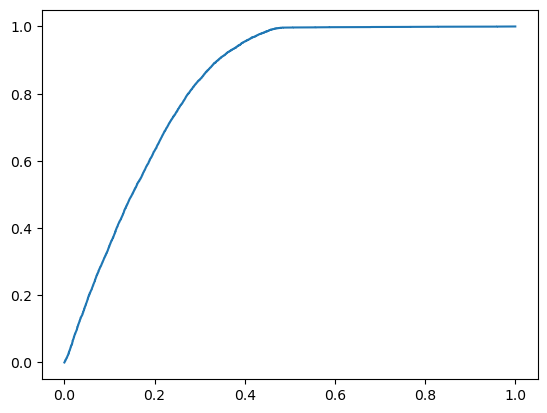

In [345]:
model_train_val_evaluation(train_X_processed, test_X_processed, train_y_processed, test_y_processed, new_model_3)

In [347]:
result3 = pd.DataFrame(grid_3.cv_results_)
result3

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.632965      0.009043         0.048334        0.002221   
1         0.806803      0.024400         0.055194        0.007469   
2         1.091938      0.014115         0.059859        0.004612   
3         0.710208      0.015499         0.049212        0.005601   
4         0.843954      0.085609         0.062554        0.003455   
..             ...           ...              ...             ...   
139       1.630343      0.077860         0.134418        0.011713   
140       3.252921      0.323070         0.282523        0.074621   
141       1.340857      0.038746         0.126674        0.010142   
142       2.069551      0.183604         0.153338        0.003596   
143       3.455320      0.135325         0.241912        0.026374   

    param_model__class_weight param_model__learning_rate  \
0                        None                       0.01   
1                        None                       0.01   
2                        None                       0.01   
3                        None                       0.01   
4                        None                       0.01   
..                        ...                        ...   
139                  balanced                        0.1   
140                  balanced                        0.1   
141                  balanced                        0.1   
142                  balanced                        0.1   
143                  balanced                        0.1   

    param_model__max_depth param_model__min_samples_split  \
0                        3                              2   
1                        3                              2   
2                        3                              2   
3                        3                              5   
4                        3                              5   
..                     ...                            ...   
139                     10                              5   
140                     10                              5   
141                     10                             10   
142                     10                             10   
143                     10                             10   

    param_model__n_estimators  \
0                          50   
1                         100   
2                         200   
3                          50   
4                         100   
..                        ...   
139                       100   
140                       200   
141                        50   
142                       100   
143                       200   

                                                                                                  params  \
0    {'model__class_weight': None, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__min_s...   
1    {'model__class_weight': None, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__min_s...   
2    {'model__class_weight': None, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__min_s...   
3    {'model__class_weight': None, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__min_s...   
4    {'model__class_weight': None, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__min_s...   
..                                                                                                   ...   
139  {'model__class_weight': 'balanced', 'model__learning_rate': 0.1, 'model__max_depth': 10, 'model_...   
140  {'model__class_weight': 'balanced', 'model__learning_rate': 0.1, 'model__max_depth': 10, 'model_...   
141  {'model__class_weight': 'balanced', 'model__learning_rate': 0.1, 'model__max_depth': 10, 'model_...   
142  {'model__class_weight': 'balanced', 'model__learning_rate': 0.1, 'model__max_depth': 10, 'model_...   
143  {'model__class_weight': 'balanced', 'model__learning_rate': 0.1, 'model__max_depth': 10, 'model_...   

     split0_test_score  spli

In [357]:
# Explore the grid_6 cv results on how this the best
pd.set_option('display.max_colwidth', 100)
result3[['params', 'mean_test_score','rank_test_score']].sort_values(by = 'rank_test_score', ascending = True)

params  \
59   {'model__class_weight': None, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__min_sa...   
134  {'model__class_weight': 'balanced', 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__...   
131  {'model__class_weight': 'balanced', 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__...   
62   {'model__class_weight': None, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__min_sa...   
128  {'model__class_weight': 'balanced', 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__...   
..                                                                                                   ...   
78   {'model__class_weight': 'balanced', 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model_...   
3    {'model__class_weight': None, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__min_s...   
75   {'model__class_weight': 'balanced', 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model_...   
72   {'model__class_weight': 'balanced', 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model_...   
0    {'model__class_weight': None, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__min_s...   

     mean_test_score  rank_test_score  
59          0.826957                1  
134         0.826957                1  
131         0.826957                1  
62          0.826957                1  
128         0.826957                1  
..               ...              ...  
78          0.816848              139  
3           0.816848              139  
75          0.816848              139  
72          0.816848              139  
0           0.816848              139  

[144 rows x 3 columns]

In [376]:
# updating the existing target values with predicted values
sub['Response'] = new_model_3.predict(test)

In [378]:
sub.to_csv('sub_3.csv', index=False)

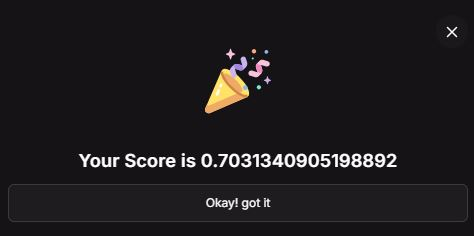

In [419]:
# reduce the size of the dataset for faster run of grid search cv
train_X_sample, val_X_sample, train_y_sample, val_y_sample = train_test_split(X_processed,y, train_size = 0.05, stratify = y, random_state = 3000)

In [423]:
train_X_sample.shape, val_X_sample.shape, train_y_sample.shape, val_y_sample.shape

((19055, 11), (362054, 11), (19055, 1), (362054, 1))

In [472]:
# defining a model pipeline to execute preprocessing and apply a Random forest with SMOTE
model_pipeline_smote_random_forest = Pipeline(
    steps=[
        ('smote', SMOTE(random_state=42)), #oversampling minority class
        ('preprocessing1', preprocessing1),
        ('model', RandomForestClassifier(n_estimators=100))
    ]
)

In [441]:
params_4 = {
    #'model': [RandomForestClassifier],
    #'model__n_estimators': [100, 200],  # Number of trees
    'model__max_depth': [7, 10, 20],    # Depth of each tree
    'model__min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'model__class_weight': [None, 'balanced'],  # Handle class imbalance   
    'model__n_jobs': [-1]
}

In [443]:
grid_4 = GridSearchCV(estimator = model_pipeline_smote_random_forest, param_grid=params_4, cv=3, scoring = 'roc_auc')

In [445]:
grid_4.fit(train_X_sample, train_y_sample)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('preprocessing1',
                                        ColumnTransformer(transformers=[('numerical_pipeline_encode1',
                                                                         Pipeline(steps=[('impute_numerical1',
                                                                                          SimpleImputer()),
                                                                                         ('scale1',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__max_depth': [7, 10, 20],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_jobs': [-1]},
             scoring='roc_auc')

In [447]:
grid_4.best_params_

{'model__class_weight': None,
 'model__max_depth': 10,
 'model__min_samples_split': 2,
 'model__n_jobs': -1}

In [449]:
grid_4.best_estimator_

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('preprocessing1',
                 ColumnTransformer(transformers=[('numerical_pipeline_encode1',
                                                  Pipeline(steps=[('impute_numerical1',
                                                                   SimpleImputer()),
                                                                  ('scale1',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model', RandomForestClassifier(max_depth=10, n_jobs=-1))])

In [451]:
new_model_4 = grid_4.best_estimator_

Train auc score
0.7967642516111185
Valid auc score
0.7385881311939959
Train confusion_matrix
[[12831  3889]
 [  406  1929]]
Valid confusion_matrix
[[239143  78536]
 [ 12230  32145]]
Train classification_report
              precision    recall  f1-score   support

           0       0.97      0.77      0.86     16720
           1       0.33      0.83      0.47      2335

    accuracy                           0.77     19055
   macro avg       0.65      0.80      0.66     19055
weighted avg       0.89      0.77      0.81     19055

Valid classification_report
              precision    recall  f1-score   support

           0       0.95      0.75      0.84    317679
           1       0.29      0.72      0.41     44375

    accuracy                           0.75    362054
   macro avg       0.62      0.74      0.63    362054
weighted avg       0.87      0.75      0.79    362054

Evaluate model pipeline using predict_proba


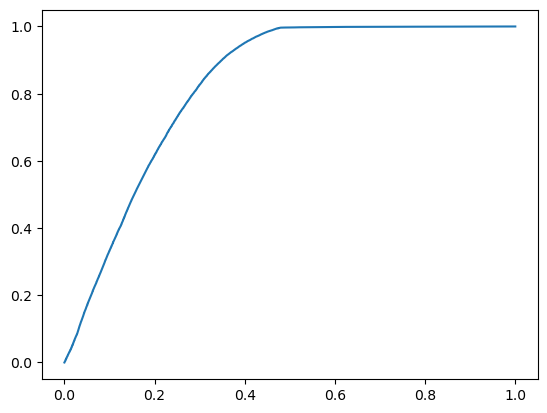

In [524]:
model_train_val_evaluation(train_X_sample, val_X_sample, train_y_sample, val_y_sample, new_model_4)

In [455]:
result4 = pd.DataFrame(grid_4.cv_results_)
result4

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.054982      1.116184         0.048711        0.002003   
1        0.253736      0.001500         0.045720        0.001665   
2        0.264360      0.001003         0.042347        0.007172   
3        0.292028      0.006127         0.041644        0.007351   
4        0.286094      0.014926         0.036501        0.007334   
5        0.247135      0.006733         0.046898        0.000004   
6        0.392353      0.025499         0.047233        0.000506   
7        0.416717      0.012615         0.041748        0.007425   
8        0.363622      0.012470         0.035158        0.008940   
9        0.306263      0.012082         0.039307        0.006413   
10       0.282001      0.019750         0.046907        0.000011   
11       0.262756      0.007687         0.036801        0.007873   
12       0.320178      0.008531         0.036303        0.007151   
13       0.332694      0.009709         0.036691        0.007246   
14       0.319160      0.010000         0.040902        0.006861   
15       0.405428      0.012573         0.051405        0.005814   
16       0.411851      0.009362         0.051290        0.004082   
17       0.397632      0.007986         0.047259        0.000484   

   param_model__class_weight param_model__max_depth  \
0                       None                      7   
1                       None                      7   
2                       None                      7   
3                       None                     10   
4                       None                     10   
5                       None                     10   
6                       None                     20   
7                       None                     20   
8                       None                     20   
9                   balanced                      7   
10                  balanced                      7   
11                  balanced                      7   
12                  balanced                     10   
13                  balanced                     10   
14                  balanced                     10   
15                  balanced                     20   
16                  balanced                     20   
17                  balanced                     20   

   param_model__min_samples_split param_model__n_jobs  \
0                               2                  -1   
1                               5                  -1   
2                              10                  -1   
3                               2                  -1   
4                               5                  -1   
5                              10                  -1   
6                               2                  -1   
7                               5                  -1   
8                              10                  -1   
9                               2                  -1   
10                              5                  -1   
11                             10                  -1   
12                              2                  -1   
13                              5                  -1   
14                             10                  -1   
15                              2                  -1   
16                              5                  -1   
17                             10                  -1   

                                                                                                 params  \
0   {'model__class_weight': None, 'model__max_depth': 7, 'model__min_samples_split': 2, 'model__n_jo...   
1   {'model__class_weight': None, 'model__max_depth': 7, 'model__min_samples_split': 5, 'model__n_jo...   
2   {'model__class_weight': None, 'model__max_depth': 7, 'model__min_samples_split': 10, 'model__n_j...   
3   {'model__class_weight': None, 'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_j...   
4   {'model__class_weight': None, 'model__max_

In [461]:
# Explore the grid_4 cv results on how this the best
pd.set_option('display.max_colwidth', 100)
result4[['params', 'mean_test_score','rank_test_score']].sort_values(by = 'rank_test_score', ascending = True)

params  \
3   {'model__class_weight': None, 'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_j...   
9   {'model__class_weight': 'balanced', 'model__max_depth': 7, 'model__min_samples_split': 2, 'model...   
12  {'model__class_weight': 'balanced', 'model__max_depth': 10, 'model__min_samples_split': 2, 'mode...   
13  {'model__class_weight': 'balanced', 'model__max_depth': 10, 'model__min_samples_split': 5, 'mode...   
4   {'model__class_weight': None, 'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_j...   
0   {'model__class_weight': None, 'model__max_depth': 7, 'model__min_samples_split': 2, 'model__n_jo...   
2   {'model__class_weight': None, 'model__max_depth': 7, 'model__min_samples_split': 10, 'model__n_j...   
11  {'model__class_weight': 'balanced', 'model__max_depth': 7, 'model__min_samples_split': 10, 'mode...   
1   {'model__class_weight': None, 'model__max_depth': 7, 'model__min_samples_split': 5, 'model__n_jo...   
10  {'model__class_weight': 'balanced', 'model__max_depth': 7, 'model__min_samples_split': 5, 'model...   
5   {'model__class_weight': None, 'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_...   
14  {'model__class_weight': 'balanced', 'model__max_depth': 10, 'model__min_samples_split': 10, 'mod...   
17  {'model__class_weight': 'balanced', 'model__max_depth': 20, 'model__min_samples_split': 10, 'mod...   
8   {'model__class_weight': None, 'model__max_depth': 20, 'model__min_samples_split': 10, 'model__n_...   
16  {'model__class_weight': 'balanced', 'model__max_depth': 20, 'model__min_samples_split': 5, 'mode...   
6   {'model__class_weight': None, 'model__max_depth': 20, 'model__min_samples_split': 2, 'model__n_j...   
7   {'model__class_weight': None, 'model__max_depth': 20, 'model__min_samples_split': 5, 'model__n_j...   
15  {'model__class_weight': 'balanced', 'model__max_depth': 20, 'model__min_samples_split': 2, 'mode...   

    mean_test_score  rank_test_score  
3          0.826462                1  
9          0.826456                2  
12         0.825915                3  
13         0.825892                4  
4          0.825781                5  
0          0.825723                6  
2          0.825692                7  
11         0.825514                8  
1          0.825443                9  
10         0.825224               10  
5          0.825149               11  
14         0.825093               12  
17         0.821174               13  
8          0.820815               14  
16         0.818693               15  
6          0.818264               16  
7          0.817546               17  
15         0.817100               18

In [465]:
# updating the existing target values with predicted values
sub['Response'] = new_model_4.predict(test)

In [467]:
sub.to_csv('sub_4.csv', index=False)

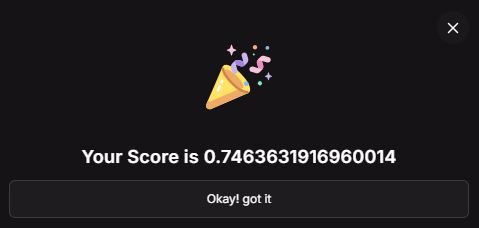

In [502]:
params_5 = [
    {
        'model': [XGBClassifier()],
        'model__n_estimators': [1841],
        'model__max_depth': [4],
        'model__learning_rate': [0.0148],
        'model__min_child_weight': [0.6],
        'model__subsample': [0.96],
        'model__colsample_bytree': [0.8],
        'model__scale_pos_weight': [3],
        'model__random_state' : [21],
        'model__n_jobs' : [-1]
    },
    {
        'model': [LGBMClassifier()],
        'model__num_leaves' : [665], 
        'model__max_depth' :[11], 
        'model__learning_rate': [0.0119], 
        'model__n_estimators':[1191],
        'model__min_child_weight' :[0.75], 
        'model__min_child_samples': [277], 
        'model__subsample': [0.61], 
        'model__colsample_bytree': [0.79], 
        'model__scale_pos_weight':[2], 
        'model__random_state' : [21],
        'model__n_jobs' : [-1]
    },
    {
        'model': [CatBoostClassifier()],
        'model__iterations' : [1000], 
        'model__loss_function': ['Logloss'],
        'model__eval_metric': ['AUC'],
        'model__depth' :[7], 
        'model__learning_rate': [0.05],
        'model__l2_leaf_reg': [0.30],
        'model__scale_pos_weight':[3], 
        'model__random_state' : [21],
    },
]

In [508]:
grid_5 = GridSearchCV(estimator = model_pipeline_smote_random_forest, param_grid=params_5, cv=3, scoring = 'roc_auc')

In [533]:
grid_5.fit(train_X_sample, train_y_sample)

In [512]:
grid_5.best_params_

{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.0148, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=4, max_leaves=None,
               min_child_weight=0.6, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=1841, n_jobs=-1,
               num_parallel_tree=None, random_state=21, ...),
 'model__colsample_bytree': 0.8,
 'model__learning_rate': 0.0148,
 'model__max_depth': 4,
 'model__min_child_weight': 0.6,
 'model__n_estimators': 1841,
 'model__n_jobs': -1,
 'model__random_state': 21,
 'model__scale_pos_weight

In [514]:
grid_5.best_estimator_

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('preprocessing1',
                 ColumnTransformer(transformers=[('numerical_pipeline_encode1',
                                                  Pipeline(steps=[('impute_numerical1',
                                                                   SimpleImputer()),
                                                                  ('scale1',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.0148, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=4,
                               max_leaves=None, min_child_weight=0.6,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=1841,
                               n_jobs=-1, num_parallel_tree=None,
                               random_state=21, ...))])

In [516]:
new_model_5 = grid_5.best_estimator_

Train auc score
0.8080417610114443
Valid auc score
0.761866360998916
Train confusion_matrix
[[11776  4944]
 [  206  2129]]
Valid confusion_matrix
[[220021  97658]
 [  7493  36882]]
Train classification_report
              precision    recall  f1-score   support

           0       0.98      0.70      0.82     16720
           1       0.30      0.91      0.45      2335

    accuracy                           0.73     19055
   macro avg       0.64      0.81      0.64     19055
weighted avg       0.90      0.73      0.78     19055

Valid classification_report
              precision    recall  f1-score   support

           0       0.97      0.69      0.81    317679
           1       0.27      0.83      0.41     44375

    accuracy                           0.71    362054
   macro avg       0.62      0.76      0.61    362054
weighted avg       0.88      0.71      0.76    362054

Evaluate model pipeline using predict_proba


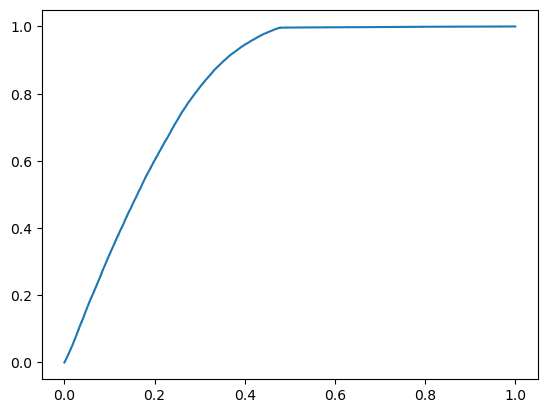

In [522]:
model_train_val_evaluation(train_X_sample, val_X_sample, train_y_sample, val_y_sample, new_model_5)

In [526]:
result5 = pd.DataFrame(grid_5.cv_results_)
result5

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.095193      0.111784         0.034449        0.004514   
1       1.451740      0.197176         0.106061        0.011930   
2       7.078117      0.153704         0.009735        0.006934   

                                                                                           param_model  \
0  XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=No...   
1                                                                                     LGBMClassifier()   
2                                      <catboost.core.CatBoostClassifier object at 0x0000019ECED43D50>   

  param_model__colsample_bytree param_model__learning_rate  \
0                           0.8                     0.0148   
1                          0.79                     0.0119   
2                           NaN                       0.05   

  param_model__max_depth param_model__min_child_weight  \
0                      4                           0.6   
1                     11                          0.75   
2                    NaN                           NaN   

  param_model__n_estimators  ... param_model__iterations  \
0                      1841  ...                     NaN   
1                      1191  ...                     NaN   
2                       NaN  ...                    1000   

  param_model__l2_leaf_reg param_model__loss_function  \
0                      NaN                        NaN   
1                      NaN                        NaN   
2                      0.3                    Logloss   

                                                                                                params  \
0  {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_b...   
1  {'model': LGBMClassifier(), 'model__colsample_bytree': 0.79, 'model__learning_rate': 0.0119, 'mo...   
2  {'model': <catboost.core.CatBoostClassifier object at 0x0000019ECED43D50>, 'model__depth': 7, 'm...   

  split0_test_score split1_test_score split2_test_score mean_test_score  \
0          0.823571          0.814554          0.822938        0.820355   
1          0.821809          0.813984          0.824070        0.819954   
2          0.815594          0.813190          0.818896        0.815894   

  std_test_score rank_test_score  
0       0.004110               1  
1       0.004321               2  
2       0.002339               3  

[3 rows x 28 columns]

In [528]:
# Explore the grid_5 cv results on how this the best
pd.set_option('display.max_colwidth', 100)
result5[['params', 'mean_test_score','rank_test_score']]

params  \
0  {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_b...   
1  {'model': LGBMClassifier(), 'model__colsample_bytree': 0.79, 'model__learning_rate': 0.0119, 'mo...   
2  {'model': <catboost.core.CatBoostClassifier object at 0x0000019ECED43D50>, 'model__depth': 7, 'm...   

   mean_test_score  rank_test_score  
0         0.820355                1  
1         0.819954                2  
2         0.815894                3

In [530]:
# updating the existing target values with predicted values
sub['Response'] = new_model_5.predict(test)
sub.to_csv('sub_5.csv', index=False)

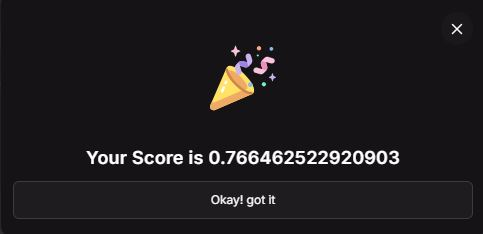

In [537]:
# reduce the size of the dataset for faster run of grid search cv
train_X_sample1, val_X_sample1, train_y_sample1, val_y_sample1 = train_test_split(X_processed,y, train_size = 0.2, stratify = y, random_state = 3000)

In [539]:
params_6 = [
    {
        'model': [XGBClassifier()],
        'model__n_estimators': [1841],
        'model__max_depth': [4],
        'model__learning_rate': [0.01],
        'model__min_child_weight': [0.6],
        'model__subsample': [0.96],
        'model__colsample_bytree': [0.8],
        'model__scale_pos_weight': [3],
        'model__random_state' : [21],
        'model__n_jobs' : [-1]
    },
    {
        'model': [LGBMClassifier()],
        'model__num_leaves' : [665], 
        'model__max_depth' :[11], 
        'model__learning_rate': [0.0119], 
        'model__n_estimators':[1191],
        'model__min_child_weight' :[0.75], 
        'model__min_child_samples': [277], 
        'model__subsample': [0.61], 
        'model__colsample_bytree': [0.79], 
        'model__scale_pos_weight':[2], 
        'model__random_state' : [21],
        'model__n_jobs' : [-1]
    },
    {
        'model': [CatBoostClassifier()],
        'model__iterations' : [1000], 
        'model__loss_function': ['Logloss'],
        'model__eval_metric': ['AUC'],
        'model__depth' :[7], 
        'model__learning_rate': [0.05],
        'model__l2_leaf_reg': [0.30],
        'model__scale_pos_weight':[3], 
        'model__random_state' : [21],
    },
    {
        'model': [LogisticRegression()],
        'model__penalty': ['l2', None],
        'model__C':[0.5,3]        
    },
    {
        'model': [DecisionTreeClassifier()],
        'model__max_depth': [3,5]        
    }
]

In [566]:
grid_6 = GridSearchCV(estimator = model_pipeline_smote_random_forest, param_grid=params_6, cv=5, scoring = 'roc_auc')

In [752]:
#grid_6.fit(train_X_sample1, train_y_sample1)

In [570]:
grid_6.best_params_

{'model': <catboost.core.CatBoostClassifier at 0x19ed1518210>,
 'model__depth': 7,
 'model__eval_metric': 'AUC',
 'model__iterations': 1000,
 'model__l2_leaf_reg': 0.3,
 'model__learning_rate': 0.05,
 'model__loss_function': 'Logloss',
 'model__random_state': 21,
 'model__scale_pos_weight': 3}

In [572]:
grid_6.best_estimator_

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('preprocessing1',
                 ColumnTransformer(transformers=[('numerical_pipeline_encode1',
                                                  Pipeline(steps=[('impute_numerical1',
                                                                   SimpleImputer()),
                                                                  ('scale1',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x0000019ED1571390>)])

In [574]:
new_model_6 = grid_6.best_estimator_

Train auc score
0.807639640289032
Valid auc score
0.7572260277228476
Train confusion_matrix
[[49289 17590]
 [ 1137  8205]]
Valid confusion_matrix
[[193875  73645]
 [  7857  29511]]
Train classification_report
              precision    recall  f1-score   support

           0       0.98      0.74      0.84     66879
           1       0.32      0.88      0.47      9342

    accuracy                           0.75     76221
   macro avg       0.65      0.81      0.65     76221
weighted avg       0.90      0.75      0.79     76221

Valid classification_report
              precision    recall  f1-score   support

           0       0.96      0.72      0.83    267520
           1       0.29      0.79      0.42     37368

    accuracy                           0.73    304888
   macro avg       0.62      0.76      0.62    304888
weighted avg       0.88      0.73      0.78    304888

Evaluate model pipeline using predict_proba


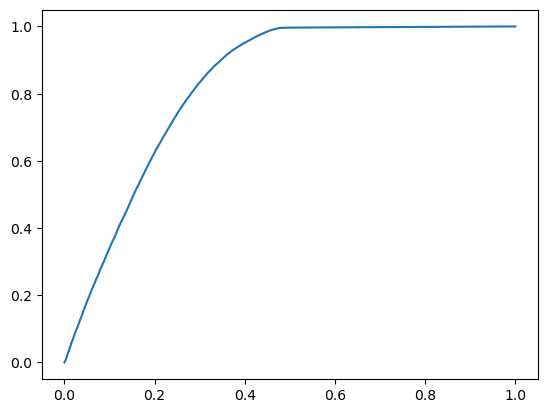

In [576]:
model_train_val_evaluation(train_X_sample1, val_X_sample1, train_y_sample1, val_y_sample1, new_model_6)

In [578]:
result6 = pd.DataFrame(grid_6.cv_results_)
result6

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.852181      0.170169         0.066675        0.012812   
1       5.834601      0.291567         0.318745        0.021224   
2      21.944861      4.062450         0.023776        0.005419   
3       0.257865      0.032439         0.017207        0.008036   
4       0.275969      0.053706         0.014579        0.002315   
5       0.349190      0.030741         0.017795        0.003133   
6       0.340204      0.051825         0.016123        0.001358   
7       0.368019      0.019540         0.018063        0.002914   
8       0.605067      0.087989         0.021022        0.003625   

                                                                                           param_model  \
0  XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=No...   
1                                                                                     LGBMClassifier()   
2                                      <catboost.core.CatBoostClassifier object at 0x0000019ED1518210>   
3                                                                                 LogisticRegression()   
4                                                                                 LogisticRegression()   
5                                                                                 LogisticRegression()   
6                                                                                 LogisticRegression()   
7                                                                             DecisionTreeClassifier()   
8                                                                             DecisionTreeClassifier()   

  param_model__colsample_bytree param_model__learning_rate  \
0                           0.8                       0.01   
1                          0.79                     0.0119   
2                           NaN                       0.05   
3                           NaN                        NaN   
4                           NaN                        NaN   
5                           NaN                        NaN   
6                           NaN                        NaN   
7                           NaN                        NaN   
8                           NaN                        NaN   

  param_model__max_depth param_model__min_child_weight  \
0                      4                           0.6   
1                     11                          0.75   
2                    NaN                           NaN   
3                    NaN                           NaN   
4                    NaN                           NaN   
5                    NaN                           NaN   
6                    NaN                           NaN   
7                      3                           NaN   
8                      5                           NaN   

  param_model__n_estimators  ... param_model__penalty  \
0                      1841  ...                  NaN   
1                      1191  ...                  NaN   
2                       NaN  ...                  NaN   
3                       NaN  ...                   l2   
4                       NaN  ...                 None   
5                       NaN  ...                   l2   
6                       NaN  ...                 None   
7                       NaN  ...                  NaN   
8                       NaN  ...                  NaN   

                                                                                                params  \
0  {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_b...   
1  {'model': LGBMClassifier(), 'model__colsample_bytree': 0.79, 'model__learning_rate': 0.0119, 'mo...   
2  {'model': <catboost.core.CatBoostClassifier object at 0x0000019ED1518210>, 'model__depth': 7, 'm...   
3                             {'model': LogisticRegression(), 'model__C': 

In [580]:
# Explore the grid_6 cv results on how this the best
pd.set_option('display.max_colwidth', 100)
result6[['params', 'mean_test_score','rank_test_score']]

params  \
0  {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_b...   
1  {'model': LGBMClassifier(), 'model__colsample_bytree': 0.79, 'model__learning_rate': 0.0119, 'mo...   
2  {'model': <catboost.core.CatBoostClassifier object at 0x0000019ED1518210>, 'model__depth': 7, 'm...   
3                             {'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}   
4                             {'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}   
5                               {'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}   
6                               {'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}   
7                                           {'model': DecisionTreeClassifier(), 'model__max_depth': 3}   
8                                           {'model': DecisionTreeClassifier(), 'model__max_depth': 5}   

   mean_test_score  rank_test_score  
0         0.827193                3  
1         0.829155                2  
2         0.829858                1  
3         0.794677                9  
4         0.794677                7  
5         0.794678                6  
6         0.794677                7  
7         0.811920                5  
8         0.816571                4

In [582]:
# updating the existing target values with predicted values
sub['Response'] = new_model_6.predict(test)
sub.to_csv('sub_6.csv', index=False)

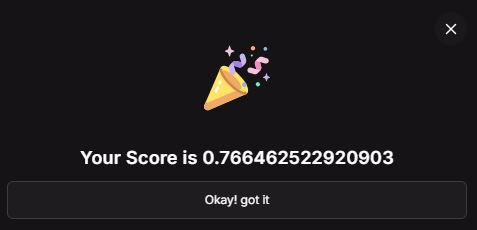

In [596]:
params_7 = [
    {
        'model': [LogisticRegression()],
        'model__penalty': ['l2', None],
        'model__C':[0.5,3]        
    },
    {
        'model': [DecisionTreeClassifier()],
        'model__max_depth': [3,5]        
    },
    {
        'model': [StackingClassifier(estimators = [
                                     ['stacking_classifier_1', RandomForestClassifier()],
                                     ['stacking_classifier_2', GradientBoostingClassifier()],
                                     ['stacking_classifier_3', AdaBoostClassifier()],
                                     ['stacking_classifier_4', XGBClassifier()],
                                     ['stacking_classifier_5', LGBMClassifier()]                                     
        ],
                                     final_estimator=DecisionTreeClassifier()
                                                      )],
        'model__stacking_classifier_1__max_depth': [4,8],
        'model__stacking_classifier_2__n_estimators': [15,25],
        'model__stacking_classifier_3__n_estimators': [15,35],
        'model__stacking_classifier_4__n_estimators': [1800],
        'model__stacking_classifier_4__max_depth': [6],
        'model__stacking_classifier_4__learning_rate': [0.01],
        'model__stacking_classifier_5__max_depth': [11],
        'model__stacking_classifier_5__learning_rate': [0.01] 
    },
    {
        'model': [CatBoostClassifier()],
        'model__iterations' : [100], 
        'model__loss_function': ['Logloss'],
        'model__eval_metric': ['Logloss'],
        'model__depth' :[8], 
        'model__learning_rate': [0.02],
        'model__l2_leaf_reg': [0.30],
        'model__scale_pos_weight':[3], 
        'model__random_state' : [21],
    }]

In [598]:
grid_7 = GridSearchCV(estimator = model_pipeline_smote_random_forest, param_grid=params_7, cv=5, scoring = 'roc_auc')

In [754]:
#grid_7.fit(train_X_sample, train_y_sample)

In [602]:
grid_7.best_params_

{'model': <catboost.core.CatBoostClassifier at 0x19f41051bd0>,
 'model__depth': 8,
 'model__eval_metric': 'Logloss',
 'model__iterations': 100,
 'model__l2_leaf_reg': 0.3,
 'model__learning_rate': 0.02,
 'model__loss_function': 'Logloss',
 'model__random_state': 21,
 'model__scale_pos_weight': 3}

In [604]:
grid_7.best_estimator_

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('preprocessing1',
                 ColumnTransformer(transformers=[('numerical_pipeline_encode1',
                                                  Pipeline(steps=[('impute_numerical1',
                                                                   SimpleImputer()),
                                                                  ('scale1',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x0000019F4104EF90>)])

In [606]:
new_model_7 = grid_7.best_estimator_

Train auc score
0.776609266826199
Valid auc score
0.7734243164327588
Train confusion_matrix
[[39354 27525]
 [  329  9013]]
Valid confusion_matrix
[[157232 110288]
 [  1528  35840]]
Train classification_report
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66879
           1       0.25      0.96      0.39      9342

    accuracy                           0.63     76221
   macro avg       0.62      0.78      0.57     76221
weighted avg       0.90      0.63      0.70     76221

Valid classification_report
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    267520
           1       0.25      0.96      0.39     37368

    accuracy                           0.63    304888
   macro avg       0.62      0.77      0.56    304888
weighted avg       0.90      0.63      0.70    304888

Evaluate model pipeline using predict_proba


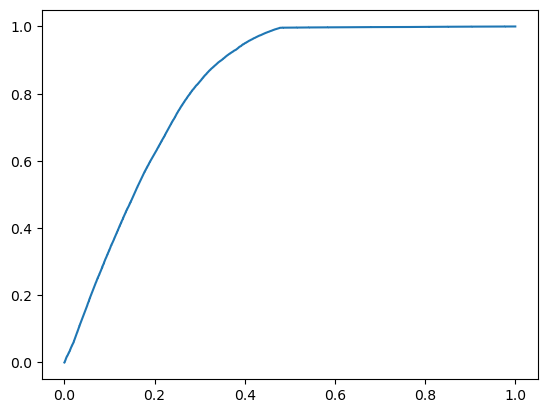

In [608]:
model_train_val_evaluation(train_X_sample1, val_X_sample1, train_y_sample1, val_y_sample1, new_model_7)

In [610]:
result7 = pd.DataFrame(grid_7.cv_results_)
result7

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.068667      0.007801         0.009617        0.007866   
1        0.076073      0.004572         0.015635        0.000011   
2        0.078886      0.005128         0.007761        0.007027   
3        0.080345      0.012063         0.009381        0.007660   
4        0.066104      0.007157         0.006294        0.007620   
5        0.075020      0.006263         0.012501        0.006251   
6       19.990297      1.364000         0.077328        0.014169   
7       26.457324      0.679993         0.112950        0.018814   
8       28.546967      3.420723         0.102188        0.018127   
9       28.680011      2.466024         0.137336        0.040294   
10      23.342913      1.884915         0.085701        0.015622   
11      26.525707      2.390225         0.096263        0.017226   
12      28.556695      1.466921         0.099467        0.015242   
13      28.839893      2.207460         0.105947        0.012570   
14       0.912838      0.075130         0.014781        0.003892   

                                                                                            param_model  \
0                                                                                  LogisticRegression()   
1                                                                                  LogisticRegression()   
2                                                                                  LogisticRegression()   
3                                                                                  LogisticRegression()   
4                                                                              DecisionTreeClassifier()   
5                                                                              DecisionTreeClassifier()   
6   StackingClassifier(estimators=[['stacking_classifier_1',\n                                Random...   
7   StackingClassifier(estimators=[['stacking_classifier_1',\n                                Random...   
8   StackingClassifier(estimators=[['stacking_classifier_1',\n                                Random...   
9   StackingClassifier(estimators=[['stacking_classifier_1',\n                                Random...   
10  StackingClassifier(estimators=[['stacking_classifier_1',\n                                Random...   
11  StackingClassifier(estimators=[['stacking_classifier_1',\n                                Random...   
12  StackingClassifier(estimators=[['stacking_classifier_1',\n                                Random...   
13  StackingClassifier(estimators=[['stacking_classifier_1',\n                                Random...   
14                                      <catboost.core.CatBoostClassifier object at 0x0000019F41051BD0>   

   param_model__C param_model__penalty param_model__max_depth  \
0             0.5                   l2                    NaN   
1             0.5                 None                    NaN   
2               3                   l2                    NaN   
3               3                 None                    NaN   
4             NaN                  NaN                      3   
5             NaN                  NaN                      5   
6             NaN                  NaN                    NaN   
7             NaN                  NaN                    NaN   
8             NaN                  NaN                    NaN   
9             NaN                  NaN                    NaN   
10            NaN                  NaN                    NaN   
11            NaN                  NaN                    NaN   
12            NaN                  NaN                    NaN   
13            NaN                  NaN                    NaN   
14            NaN                  NaN                    NaN   

   param_model__stacking_classifier_1__max_depth  \
0                                            NaN   
1                                            NaN   
2    

In [612]:
# Explore the grid_7 cv results on how this the best
pd.set_option('display.max_colwidth', 100)
result7[['params', 'mean_test_score','rank_test_score']]

params  \
0                              {'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}   
1                              {'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}   
2                                {'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}   
3                                {'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}   
4                                            {'model': DecisionTreeClassifier(), 'model__max_depth': 3}   
5                                            {'model': DecisionTreeClassifier(), 'model__max_depth': 5}   
6   {'model': StackingClassifier(estimators=[['stacking_classifier_1',
                             ...   
7   {'model': StackingClassifier(estimators=[['stacking_classifier_1',
                             ...   
8   {'model': StackingClassifier(estimators=[['stacking_classifier_1',
                             ...   
9   {'model': StackingClassifier(estimators=[['stacking_classifier_1',
                             ...   
10  {'model': StackingClassifier(estimators=[['stacking_classifier_1',
                             ...   
11  {'model': StackingClassifier(estimators=[['stacking_classifier_1',
                             ...   
12  {'model': StackingClassifier(estimators=[['stacking_classifier_1',
                             ...   
13  {'model': StackingClassifier(estimators=[['stacking_classifier_1',
                             ...   
14  {'model': <catboost.core.CatBoostClassifier object at 0x0000019F41051BD0>, 'model__depth': 8, 'm...   

    mean_test_score  rank_test_score  
0          0.784855                4  
1          0.784830                6  
2          0.784834                5  
3          0.784830                6  
4          0.807783                3  
5          0.812818                2  
6          0.615013               10  
7          0.606710               13  
8          0.616012                9  
9          0.604800               14  
10         0.602199               15  
11         0.607830               12  
12         0.621480                8  
13         0.611900               11  
14         0.826287                1

In [614]:
# updating the existing target values with predicted values
sub['Response'] = new_model_7.predict(test)
sub.to_csv('sub_7.csv', index=False)

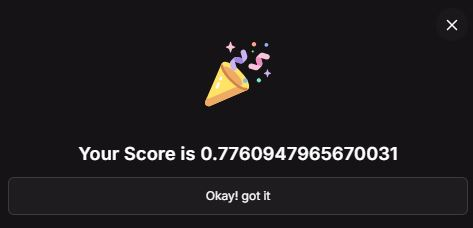

##### Approach 8 & 9: 
1. Split the train test using stratified split
2. use whole train and test instead of samples
3. use the decision tree classifier by evaluating gini and entropy in the criterion
4. use the basic model without SMOTE
5. use grid search and random search

In [782]:
# read the data
#os.chdir(r"C:\Users\raviksa\Documents\Inceptez 23\JanataHack-cross-sell-prediction\dataset")
#train = pd.read_csv("train.csv")

In [784]:
#os.chdir(r"C:\Users\raviksa\Documents\Inceptez 23\JanataHack-cross-sell-prediction")

In [786]:
# Populate X for training the appropriate columns data
#X= train.drop(columns = ignore_columns+ target_columns)

In [788]:
# populating y which is the target
#y = train[target_columns]

In [790]:
#X.head()

In [792]:
#y.head()

In [780]:
# split into training and testing sets
train_X_stratified, val_X_stratified, train_y_stratified, val_y_stratified = train_test_split(X, y, test_size = 0.1, random_state = 3000, stratify=y)
train_X_stratified.shape, val_X_stratified.shape, train_y_stratified.shape, val_y_stratified.shape

((342998, 10), (38111, 10), (342998, 1), (38111, 1))

In [794]:
params_8 = [
    {
        'model': [LogisticRegression()],
        'model__penalty': ['l2', None],
        'model__C':[0.5,3]        
    },
    {
        'model': [DecisionTreeClassifier()],
        'model__max_depth': [None, 2, 3, 5, 6, 8, 10],
        'model__criterion': ['gini', 'entropy'],
        'model__min_samples_split': [2, 3, 5, 10],
        'model__min_samples_leaf': [1, 2, 3, 5]
        
    }
]

In [796]:
model_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical_pipeline_encode',
                                                  Pipeline(steps=[('impute_categorical',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('numerical_pipeline_encode',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [798]:
grid_8 = GridSearchCV(estimator = model_pipeline, param_grid=params_8, cv=5, scoring = 'roc_auc')

In [800]:
grid_8.fit(train_X_stratified, train_y_stratified) #fit on the whole stratfied train split instead of sample

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('categorical_pipeline_encode',
                                                                         Pipeline(steps=[('impute_categorical',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                                        ('numerical_pipeline_encode',
                                                                         Pipe...
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]},
                         {'model': [DecisionTreeClassifier(max_depth=10,
                                                           min_samples_split=10)],
                          'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [None, 2, 3, 5, 6, 8, 10],
                          'model__min_samples_leaf': [1, 2, 3, 5],
                          'model__min_samples_split': [2, 3, 5, 10]}],
             scoring='roc_auc')

In [802]:
grid_8.best_params_

{'model': DecisionTreeClassifier(max_depth=10, min_samples_split=10),
 'model__criterion': 'gini',
 'model__max_depth': 10,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 10}

In [804]:
grid_8.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical_pipeline_encode',
                                                  Pipeline(steps=[('impute_categorical',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('numerical_pipeline_encode',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model',
                 DecisionTreeClassifier(max_depth=10, min_samples_split=10))])

In [806]:
new_model_8 = grid_8.best_estimator_

Train auc score
0.5027890949292719
Valid auc score
0.5012168959138079
Train confusion_matrix
[[300891     68]
 [ 41795    244]]
Valid confusion_matrix
[[33414    26]
 [ 4656    15]]
Train classification_report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    300959
           1       0.78      0.01      0.01     42039

    accuracy                           0.88    342998
   macro avg       0.83      0.50      0.47    342998
weighted avg       0.87      0.88      0.82    342998

Valid classification_report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     33440
           1       0.37      0.00      0.01      4671

    accuracy                           0.88     38111
   macro avg       0.62      0.50      0.47     38111
weighted avg       0.81      0.88      0.82     38111

Evaluate model pipeline using predict_proba


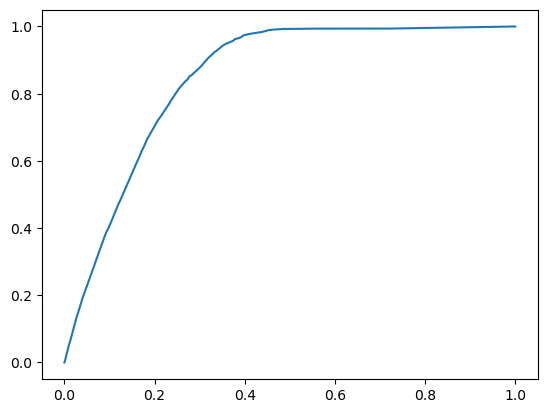

In [833]:
model_train_val_evaluation(train_X_stratified, val_X_stratified, train_y_stratified, val_y_stratified, new_model_8)

In [810]:
result8 = pd.DataFrame(grid_8.cv_results_)
result8

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         1.236995      0.170285         0.073290        0.012281   
1         0.770311      0.037342         0.053741        0.006667   
2         0.975374      0.151285         0.086522        0.016668   
3         1.138411      0.046468         0.084976        0.006978   
4         2.218728      0.045838         0.105544        0.005893   
..             ...           ...              ...             ...   
223       1.264432      0.221334         0.079048        0.013355   
224       1.229159      0.233585         0.066878        0.009811   
225       1.492752      0.073528         0.085788        0.018382   
226       1.326815      0.151510         0.087557        0.015869   
227       1.324515      0.201608         0.079075        0.014384   

                                                    param_model  \
0                                          LogisticRegression()   
1                                          LogisticRegression()   
2                                          LogisticRegression()   
3                                          LogisticRegression()   
4    DecisionTreeClassifier(max_depth=10, min_samples_split=10)   
..                                                          ...   
223  DecisionTreeClassifier(max_depth=10, min_samples_split=10)   
224  DecisionTreeClassifier(max_depth=10, min_samples_split=10)   
225  DecisionTreeClassifier(max_depth=10, min_samples_split=10)   
226  DecisionTreeClassifier(max_depth=10, min_samples_split=10)   
227  DecisionTreeClassifier(max_depth=10, min_samples_split=10)   

    param_model__C param_model__penalty param_model__criterion  \
0              0.5                   l2                    NaN   
1              0.5                 None                    NaN   
2                3                   l2                    NaN   
3                3                 None                    NaN   
4              NaN                  NaN                   gini   
..             ...                  ...                    ...   
223            NaN                  NaN                entropy   
224            NaN                  NaN                entropy   
225            NaN                  NaN                entropy   
226            NaN                  NaN                entropy   
227            NaN                  NaN                entropy   

    param_model__max_depth param_model__min_samples_leaf  \
0                      NaN                           NaN   
1                      NaN                           NaN   
2                      NaN                           NaN   
3                      NaN                           NaN   
4                     None                             1   
..                     ...                           ...   
223                     10                             3   
224                     10                             5   
225                     10                             5   
226                     10                             5   
227                     10                             5   

    param_model__min_samples_split  \
0                              NaN   
1                              NaN   
2                              NaN   
3                              NaN   
4                                2   
..                             ...   
223                             10   
224                              2   
225                              3   
226                              5   
227                             10   

                                                                                                  params  \
0                               {'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}   
1                               {'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}   
2                                 {'model': LogisticRegression(), 'model__C'

In [812]:
# Explore the grid_8 cv results on how this the best
pd.set_option('display.max_colwidth', 100)
result8[['params', 'mean_test_score','rank_test_score']].sort_values(by = 'rank_test_score', ascending = True)

params  \
103  {'model': DecisionTreeClassifier(max_depth=10, min_samples_split=10), 'model__criterion': 'gini'...   
101  {'model': DecisionTreeClassifier(max_depth=10, min_samples_split=10), 'model__criterion': 'gini'...   
100  {'model': DecisionTreeClassifier(max_depth=10, min_samples_split=10), 'model__criterion': 'gini'...   
102  {'model': DecisionTreeClassifier(max_depth=10, min_samples_split=10), 'model__criterion': 'gini'...   
107  {'model': DecisionTreeClassifier(max_depth=10, min_samples_split=10), 'model__criterion': 'gini'...   
..                                                                                                   ...   
118  {'model': DecisionTreeClassifier(max_depth=10, min_samples_split=10), 'model__criterion': 'entro...   
5    {'model': DecisionTreeClassifier(max_depth=10, min_samples_split=10), 'model__criterion': 'gini'...   
117  {'model': DecisionTreeClassifier(max_depth=10, min_samples_split=10), 'model__criterion': 'entro...   
4    {'model': DecisionTreeClassifier(max_depth=10, min_samples_split=10), 'model__criterion': 'gini'...   
116  {'model': DecisionTreeClassifier(max_depth=10, min_samples_split=10), 'model__criterion': 'entro...   

     mean_test_score  rank_test_score  
103         0.848730                1  
101         0.848634                2  
100         0.848614                3  
102         0.848611                4  
107         0.848513                5  
..               ...              ...  
118         0.620022              224  
5           0.609554              225  
117         0.604862              226  
4           0.603180              227  
116         0.599213              228  

[228 rows x 3 columns]

In [814]:
# updating the existing target values with predicted values
sub['Response'] = new_model_8.predict(test)
sub.to_csv('sub_8.csv', index=False)

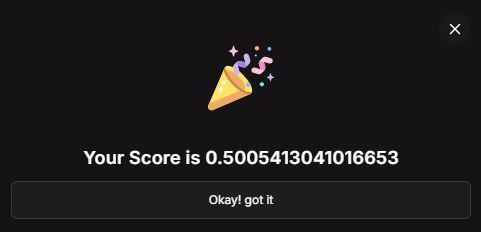

In [835]:
params_9 = [
    {
        'model': [LogisticRegression()],
        'model__penalty': ['l2', None],
        'model__C':[0.5,3]        
    },
    {
        'model': [DecisionTreeClassifier()],
        'model__max_depth': [None, 2, 3, 5, 6, 8, 10],
        'model__criterion': ['gini', 'entropy', 'logloss'],
        'model__min_samples_split': [2, 3, 5, 10],
        'model__min_samples_leaf': [1, 2, 3, 5]        
        
    }
]

In [837]:
model_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical_pipeline_encode',
                                                  Pipeline(steps=[('impute_categorical',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('numerical_pipeline_encode',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [839]:
grid_9 = RandomizedSearchCV(estimator = model_pipeline, param_distributions=params_9, n_iter = 100, cv=5, scoring = 'roc_auc', n_jobs=-1)

In [841]:
grid_9.fit(train_X_stratified, train_y_stratified) #fit on the whole stratfied train split instead of sample

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('categorical_pipeline_encode',
                                                                               Pipeline(steps=[('impute_categorical',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                                              ('numerical_pipeline_encode...
                   param_distributions=[{'model': [LogisticRegression()],
                                         'model__C': [0.5, 3],
                                         'model__penalty': ['l2', None]},
                                        {'model': [DecisionTreeClassifier(max_depth=10,
                                                                          min_samples_split=10)],
                                         'model__criterion': ['gini', 'entropy',
                                                              'logloss'],
                                         'model__max_depth': [None, 2, 3, 5, 6,
                                                              8, 10],
                                         'model__min_samples_leaf': [1, 2, 3,
                                                                     5],
                                         'model__min_samples_split': [2, 3, 5,
                                                                      10]}],
                   scoring='roc_auc')

In [843]:
grid_9.best_params_

{'model__min_samples_split': 10,
 'model__min_samples_leaf': 1,
 'model__max_depth': 10,
 'model__criterion': 'gini',
 'model': DecisionTreeClassifier(max_depth=10, min_samples_split=10)}

In [845]:
grid_9.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical_pipeline_encode',
                                                  Pipeline(steps=[('impute_categorical',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('numerical_pipeline_encode',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model',
                 DecisionTreeClassifier(max_depth=10, min_samples_split=10))])

In [847]:
new_model_9 = grid_9.best_estimator_

Train auc score
0.5027890949292719
Valid auc score
0.5011098524541633
Train confusion_matrix
[[300891     68]
 [ 41795    244]]
Valid confusion_matrix
[[33414    26]
 [ 4657    14]]
Train classification_report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    300959
           1       0.78      0.01      0.01     42039

    accuracy                           0.88    342998
   macro avg       0.83      0.50      0.47    342998
weighted avg       0.87      0.88      0.82    342998

Valid classification_report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     33440
           1       0.35      0.00      0.01      4671

    accuracy                           0.88     38111
   macro avg       0.61      0.50      0.47     38111
weighted avg       0.81      0.88      0.82     38111

Evaluate model pipeline using predict_proba


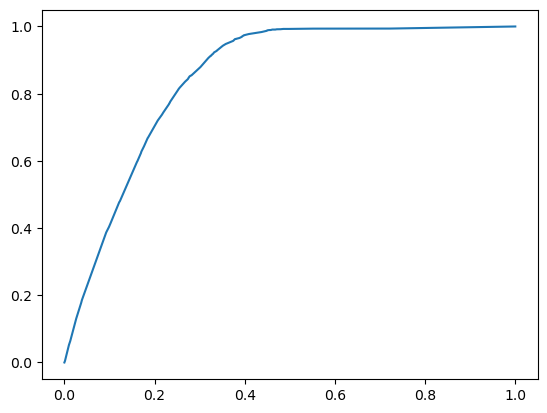

In [849]:
model_train_val_evaluation(train_X_stratified, val_X_stratified, train_y_stratified, val_y_stratified, new_model_9)

In [851]:
result9 = pd.DataFrame(grid_9.cv_results_)
result9

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.984027      0.088746         0.000000        0.000000   
1        2.964956      0.041752         0.117181        0.006768   
2        4.091157      0.082204         0.152441        0.024099   
3        1.568360      0.110970         0.126615        0.011718   
4        1.002517      0.069291         0.000000        0.000000   
..            ...           ...              ...             ...   
95       4.093111      0.202317         0.239057        0.019521   
96       6.444231      0.243747         0.258395        0.025991   
97       2.460174      0.151807         0.281999        0.026834   
98       1.584589      0.042937         0.000000        0.000000   
99       2.627152      0.103094         0.169494        0.023650   

   param_model__min_samples_split param_model__min_samples_leaf  \
0                              10                             2   
1                               5                             5   
2                              10                             5   
3                               3                             2   
4                               5                             5   
..                            ...                           ...   
95                              3                             1   
96                              5                             2   
97                              5                             3   
98                              5                             3   
99                              2                             1   

   param_model__max_depth param_model__criterion  \
0                       8                logloss   
1                       8                   gini   
2                    None                entropy   
3                       2                entropy   
4                       2                logloss   
..                    ...                    ...   
95                      8                entropy   
96                   None                   gini   
97                      2                   gini   
98                      8                logloss   
99                      5                   gini   

                                                   param_model  \
0   DecisionTreeClassifier(max_depth=10, min_samples_split=10)   
1   DecisionTreeClassifier(max_depth=10, min_samples_split=10)   
2   DecisionTreeClassifier(max_depth=10, min_samples_split=10)   
3   DecisionTreeClassifier(max_depth=10, min_samples_split=10)   
4   DecisionTreeClassifier(max_depth=10, min_samples_split=10)   
..                                                         ...   
95  DecisionTreeClassifier(max_depth=10, min_samples_split=10)   
96  DecisionTreeClassifier(max_depth=10, min_samples_split=10)   
97  DecisionTreeClassifier(max_depth=10, min_samples_split=10)   
98  DecisionTreeClassifier(max_depth=10, min_samples_split=10)   
99  DecisionTreeClassifier(max_depth=10, min_samples_split=10)   

   param_model__penalty param_model__C  \
0                   NaN            NaN   
1                   NaN            NaN   
2                   NaN            NaN   
3                   NaN            NaN   
4                   NaN            NaN   
..                  ...            ...   
95                  NaN            NaN   
96                  NaN            NaN   
97                  NaN            NaN   
98                  NaN            NaN   
99                  NaN            NaN   

                                                                                                 params  \
0   {'model__min_samples_split': 10, 'model__min_samples_leaf': 2, 'model__max_depth': 8, 'model__cr...   
1   {'model__min_samples_split': 5, 'model__min_samples_leaf': 5, 'model__max_depth': 8, 'model__cri...   
2   {'model__min_samples_split': 10, 'model__min_samples_leaf': 5, 'model__max_depth': None, 'model_...   
3   {'model__min_samples_split'

In [853]:
# Explore the grid_9 cv results on how this the best
pd.set_option('display.max_colwidth', 100)
result9[['params', 'mean_test_score','rank_test_score']].sort_values(by = 'rank_test_score', ascending = True)

params  \
77  {'model__min_samples_split': 10, 'model__min_samples_leaf': 1, 'model__max_depth': 10, 'model__c...   
81  {'model__min_samples_split': 5, 'model__min_samples_leaf': 5, 'model__max_depth': 10, 'model__cr...   
59  {'model__min_samples_split': 2, 'model__min_samples_leaf': 5, 'model__max_depth': 10, 'model__cr...   
44  {'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_depth': 10, 'model__cr...   
55  {'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_depth': 8, 'model__cri...   
..                                                                                                  ...   
68  {'model__min_samples_split': 10, 'model__min_samples_leaf': 5, 'model__max_depth': None, 'model_...   
69  {'model__min_samples_split': 3, 'model__min_samples_leaf': 1, 'model__max_depth': 6, 'model__cri...   
70  {'model__min_samples_split': 3, 'model__min_samples_leaf': 2, 'model__max_depth': 3, 'model__cri...   
54  {'model__min_samples_split': 3, 'model__min_samples_leaf': 1, 'model__max_depth': 3, 'model__cri...   
0   {'model__min_samples_split': 10, 'model__min_samples_leaf': 2, 'model__max_depth': 8, 'model__cr...   

    mean_test_score  rank_test_score  
77         0.848759                1  
81         0.848285                2  
59         0.848280                3  
44         0.848270                4  
55         0.848265                5  
..              ...              ...  
68              NaN               68  
69              NaN               68  
70              NaN               68  
54              NaN               68  
0               NaN               68  

[100 rows x 3 columns]

In [855]:
# updating the existing target values with predicted values
sub['Response'] = new_model_9.predict(test)
sub.to_csv('sub_9.csv', index=False)

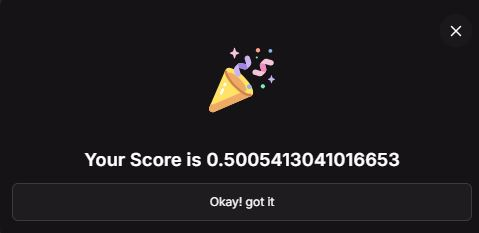

In [ ]:
#### Try out the same fit on the oversampled data

In [859]:
grid_9.fit(train_X_os, train_y_os) #fit on the oversampled train split instead of stratified split

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('categorical_pipeline_encode',
                                                                               Pipeline(steps=[('impute_categorical',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                                              ('numerical_pipeline_encode...
                                             ('model', LogisticRegression())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions=[{'model': [LogisticRegression()],
                                         'model__C': [0.5, 3],
                                         'model__penalty': ['l2', None]},
                                        {'model': [DecisionTreeClassifier()],
                                         'model__criterion': ['gini', 'entropy',
                                                              'logloss'],
                                         'model__max_depth': [None, 2, 3, 5, 6,
                                                              8, 10],
                                         'model__min_samples_leaf': [1, 2, 3,
                                                                     5],
                                         'model__min_samples_split': [2, 3, 5,
                                                                      10]}],
                   scoring='roc_auc')

In [861]:
grid_9.best_params_

{'model__min_samples_split': 2,
 'model__min_samples_leaf': 1,
 'model__max_depth': None,
 'model__criterion': 'gini',
 'model': DecisionTreeClassifier()}

In [863]:
grid_9.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical_pipeline_encode',
                                                  Pipeline(steps=[('impute_categorical',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('numerical_pipeline_encode',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier())])

In [865]:
new_model_10 = grid_9.best_estimator_

Train auc score
0.9999236060597002
Valid auc score
0.5958558564854383
Train confusion_matrix
[[301025     46]
 [     0  41927]]
Valid confusion_matrix
[[30213  3115]
 [ 3419  1364]]
Train classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    301071
           1       1.00      1.00      1.00     41927

    accuracy                           1.00    342998
   macro avg       1.00      1.00      1.00    342998
weighted avg       1.00      1.00      1.00    342998

Valid classification_report
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     33328
           1       0.30      0.29      0.29      4783

    accuracy                           0.83     38111
   macro avg       0.60      0.60      0.60     38111
weighted avg       0.82      0.83      0.83     38111

Evaluate model pipeline using predict_proba


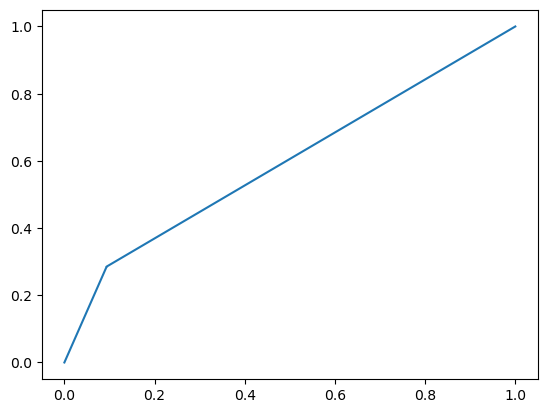

In [869]:
model_train_val_evaluation(train_X, val_X, train_y, val_y, new_model_10)

In [873]:
result10 = pd.DataFrame(grid_9.cv_results_)
result10

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.711578      0.110636         0.000000        0.000000   
1        4.478782      0.123055         0.253123        0.012636   
2        2.109649      0.096674         0.000000        0.000000   
3        2.046787      0.086875         0.000000        0.000000   
4        3.527514      0.050751         0.272723        0.024138   
..            ...           ...              ...             ...   
95       6.526327      0.065513         0.418556        0.023878   
96       6.438348      0.242526         0.481623        0.048988   
97       7.805489      0.359193         0.465824        0.037109   
98       7.020823      0.350917         0.380092        0.012888   
99       4.554427      0.242469         0.338732        0.061519   

   param_model__min_samples_split param_model__min_samples_leaf  \
0                               3                             5   
1                              10                             5   
2                              10                             5   
3                               5                             3   
4                             NaN                           NaN   
..                            ...                           ...   
95                              5                             2   
96                              5                             5   
97                              5                             2   
98                             10                             2   
99                              3                             2   

   param_model__max_depth param_model__criterion               param_model  \
0                       3                logloss  DecisionTreeClassifier()   
1                       5                   gini  DecisionTreeClassifier()   
2                       2                logloss  DecisionTreeClassifier()   
3                       5                logloss  DecisionTreeClassifier()   
4                     NaN                    NaN      LogisticRegression()   
..                    ...                    ...                       ...   
95                      6                entropy  DecisionTreeClassifier()   
96                      5                   gini  DecisionTreeClassifier()   
97                      8                   gini  DecisionTreeClassifier()   
98                      6                entropy  DecisionTreeClassifier()   
99                      2                   gini  DecisionTreeClassifier()   

   param_model__penalty param_model__C  \
0                   NaN            NaN   
1                   NaN            NaN   
2                   NaN            NaN   
3                   NaN            NaN   
4                  None              3   
..                  ...            ...   
95                  NaN            NaN   
96                  NaN            NaN   
97                  NaN            NaN   
98                  NaN            NaN   
99                  NaN            NaN   

                                                                                                 params  \
0   {'model__min_samples_split': 3, 'model__min_samples_leaf': 5, 'model__max_depth': 3, 'model__cri...   
1   {'model__min_samples_split': 10, 'model__min_samples_leaf': 5, 'model__max_depth': 5, 'model__cr...   
2   {'model__min_samples_split': 10, 'model__min_samples_leaf': 5, 'model__max_depth': 2, 'model__cr...   
3   {'model__min_samples_split': 5, 'model__min_samples_leaf': 3, 'model__max_depth': 5, 'model__cri...   
4                                {'model__penalty': None, 'model__C': 3, 'model': LogisticRegression()}   
..                                                                                                  ...   
95  {'model__min_samples_split': 5, 'model__min_samples_leaf': 2, 'model__max_depth': 6, 'model__cri...   
96  {'model__min_samples_split': 5, 'model__min_samples_leaf': 5, 'model__max_depth'

In [875]:
# Explore the grid_9 cv results on how this the best
pd.set_option('display.max_colwidth', 100)
result10[['params', 'mean_test_score','rank_test_score']].sort_values(by = 'rank_test_score', ascending = True)

params  \
69  {'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': None, 'model__...   
81  {'model__min_samples_split': 3, 'model__min_samples_leaf': 1, 'model__max_depth': None, 'model__...   
82  {'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_depth': None, 'model__...   
60  {'model__min_samples_split': 10, 'model__min_samples_leaf': 2, 'model__max_depth': None, 'model_...   
91  {'model__min_samples_split': 2, 'model__min_samples_leaf': 3, 'model__max_depth': None, 'model__...   
..                                                                                                  ...   
52  {'model__min_samples_split': 5, 'model__min_samples_leaf': 3, 'model__max_depth': 3, 'model__cri...   
65  {'model__min_samples_split': 3, 'model__min_samples_leaf': 3, 'model__max_depth': None, 'model__...   
54  {'model__min_samples_split': 5, 'model__min_samples_leaf': 2, 'model__max_depth': 6, 'model__cri...   
61  {'model__min_samples_split': 3, 'model__min_samples_leaf': 2, 'model__max_depth': 3, 'model__cri...   
0   {'model__min_samples_split': 3, 'model__min_samples_leaf': 5, 'model__max_depth': 3, 'model__cri...   

    mean_test_score  rank_test_score  
69         0.943733                1  
81         0.942723                2  
82         0.940305                3  
60         0.938651                4  
91         0.937653                5  
..              ...              ...  
52              NaN               70  
65              NaN               70  
54              NaN               70  
61              NaN               70  
0               NaN               70  

[100 rows x 3 columns]

In [877]:
# updating the existing target values with predicted values
sub['Response'] = new_model_10.predict(test)
sub.to_csv('sub_10.csv', index=False)

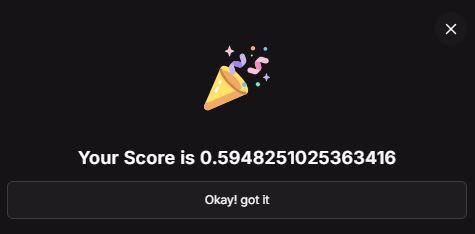

##### Creating a Pickle file

In [114]:
# create a .pkl file
joblib.dump(new_model,'vehicle_insurance_recommendation_pipeline_model.pkl')

['vehicle_insurance_recommendation_pipeline_model.pkl']

##### Interpret final results

##### AWS Light Sail container service - API Test link 
https://janatahack-cross-sell-api-test-container-service.6bmpbx6tdm81w.ap-south-1.cs.amazonlightsail.com/docs

###### Result screenshot:

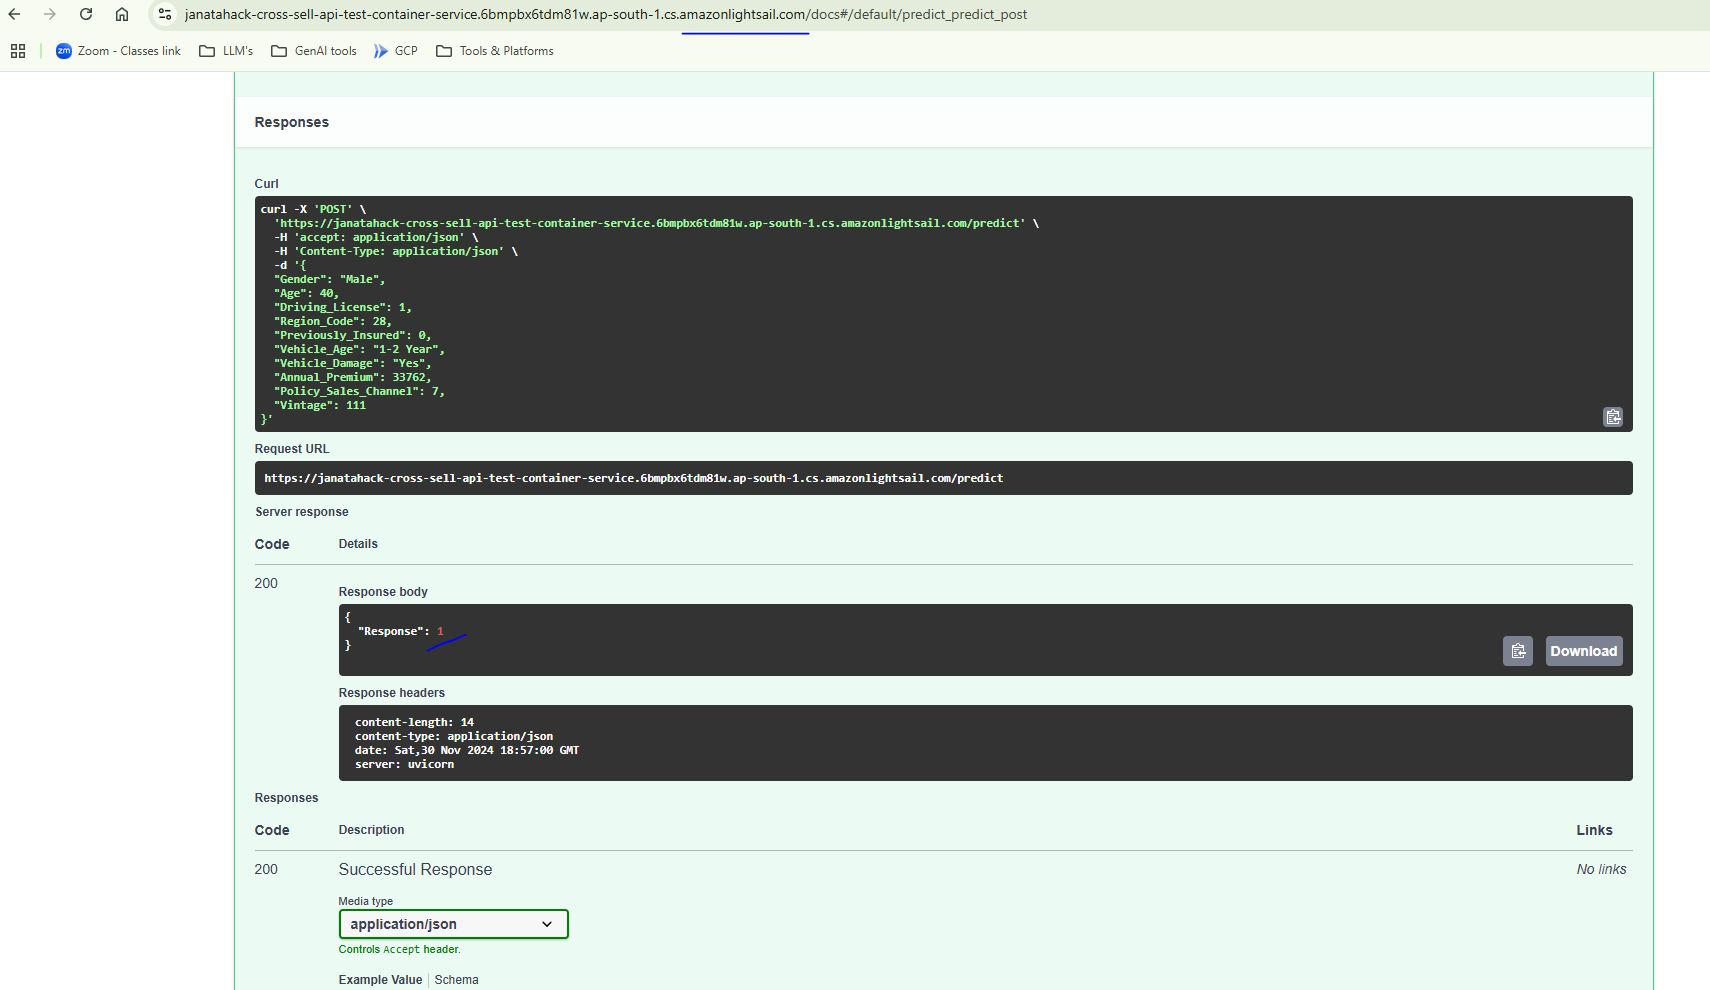

##### AWS Lightsail container service for Streamlit webview file upload test link
https://janatahack-cross-sell-streamlit-webview-fileupload-test.6bmpbx6tdm81w.ap-south-1.cs.amazonlightsail.com/

###### Result screenshot:

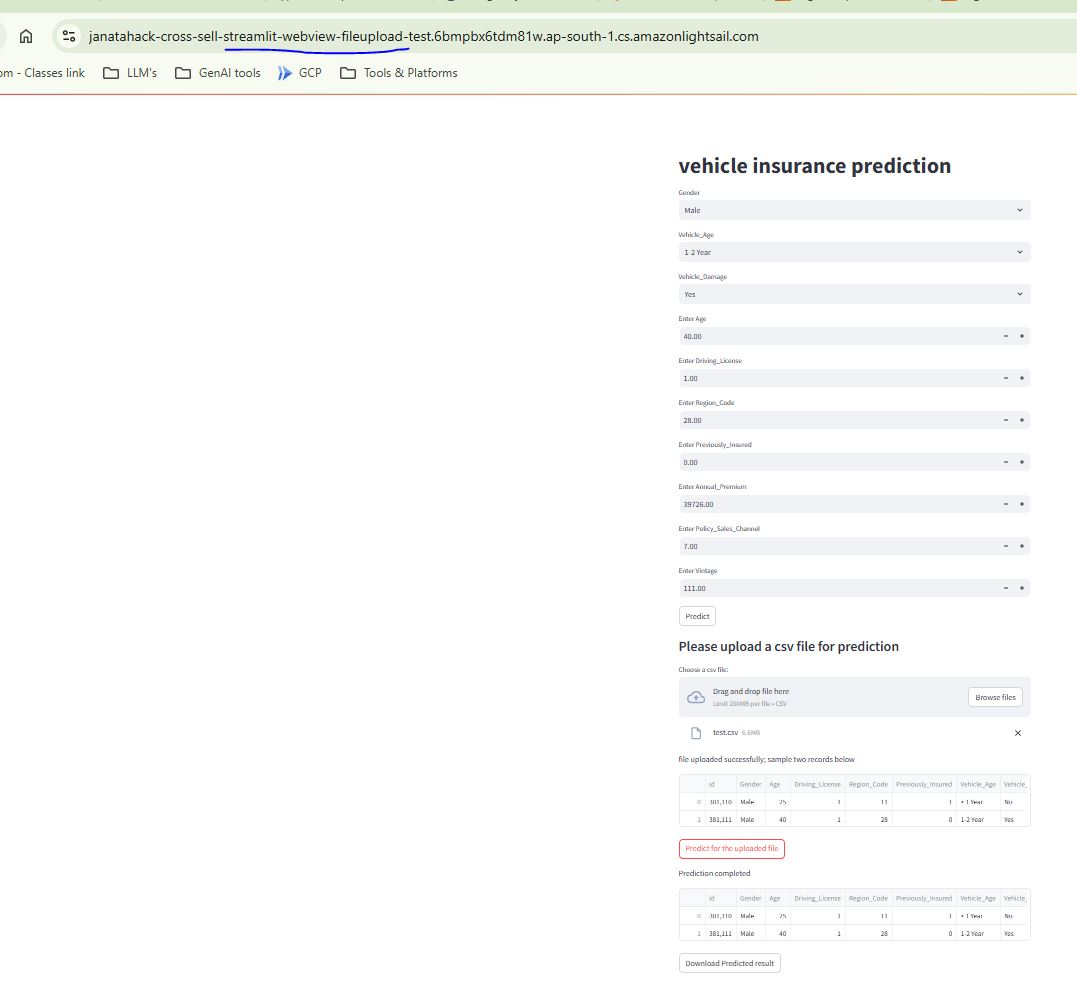

##### Rough work

In [908]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 29.1+ MB


In [910]:
X.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [912]:
y.columns

Index(['Response'], dtype='object')

In [914]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   Response  381109 non-null  int64
dtypes: int64(1)
memory usage: 2.9 MB


In [916]:
categorical_columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [918]:
numerical_columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [926]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

Copyright (c) 2007-2024 The scikit-learn developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS 

In [928]:
!pip uninstall scikit-learn

^C


In [1064]:
!pip install -U scikit-learn

^C


In [1014]:
!pip install toml

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.38.0 requires rich<14,>=10.14.0, which is not installed.
streamlit 1.38.0 requires tenacity<9,>=8.1.0, which is not installed.
streamlit 1.38.0 requires watchdog<5,>=2.1.5; platform_system != "Darwin", which is not installed.


In [1016]:
!pip install streamlit

   ---------------------------------------- 0.0/242.4 kB ? eta -:--:--
   --------------------------------- ------ 204.8/242.4 kB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 242.4/242.4 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/82.9 kB ? eta -:--:--
   ---------------------------------------- 82.9/82.9 kB 4.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/87.5 kB ? eta -:--:--
   ---------------------------------------- 87.5/87.5 kB ? eta 0:00:00


In [1018]:
!streamlit --version

Streamlit, version 1.38.0


In [1020]:
!pip install toml

In [1022]:
!pip uninstall numexpr

In [1024]:
!pip install numexpr

   ---------------------------------------- 0.0/145.0 kB ? eta -:--:--
   -- ------------------------------------- 10.2/145.0 kB ? eta -:--:--
   -- ------------------------------------- 10.2/145.0 kB ? eta -:--:--
   -------- ------------------------------ 30.7/145.0 kB 262.6 kB/s eta 0:00:01
   -------- ------------------------------ 30.7/145.0 kB 262.6 kB/s eta 0:00:01
   ----------- --------------------------- 41.0/145.0 kB 196.9 kB/s eta 0:00:01
   ---------------------- ---------------- 81.9/145.0 kB 305.0 kB/s eta 0:00:01
   ----------------------------- -------- 112.6/145.0 kB 364.4 kB/s eta 0:00:01
   ----------------------------- -------- 112.6/145.0 kB 364.4 kB/s eta 0:00:01
   -------------------------------------- 145.0/145.0 kB 391.6 kB/s eta 0:00:00


In [1026]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.12.4-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)


In [1072]:
!python --version

Python 3.11.7


In [1070]:
!pip show scikit-learn --version

Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

Copyright (c) 2007-2024 The scikit-learn developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS 

In [115]:
!pip install uvicorn

In [116]:
!where python

C:\ProgramData\anaconda3\python.exe
